## Dataset Title: [A Fine Windy Day](https://www.kaggle.com/synergystud/a-fine-windy-day-hackerearth-ml-challenge?select=train_data.csv) <a class="anchor" id="set_up"></a>

bayesian optimization ref: https://github.com/lucarabbione/BayesianOptimization/blob/master/bayopt%2Bxgbregressor.ipynb

![alt text](https://storage.googleapis.com/kaggle-datasets-images/1302693/2170048/aa9086e7d71ff86b8be01c7b7f7ada29/data-original.png?t=2021-04-28-15-08-36)

## Part A

Design machine learning models by using at least one machine learning algorithm in solving
the regression task. Your coding/report must consist of the following activities:

1. Select a suitable task and dataset. Discuss the number of samples, classes, independent variables, target variables, and the data type of the variables.

Tips: You can use some built-in functions to help you getting summary statistics of your
dataset.

### Table of Content

* [Introduction](#intro)
	* [Set-up environment](#set_up)
	* [About The Dataset](#about_dataset)
	* [Load Train Dataset](#load_train_data)
	* [Load Test Dataset](#load_test_data)
* [Dataset Exploration](#diss_dataset)
	* [Correlation Heatmap](#corr)
	* [Differentiate Catetegorical and Numeirc Explanatory Variables](#diff_cat_num)
* [Analyze Each Features and Remove Outliers](#remove_outlier)
	* [wind_speed(m/s)](#wind_speed)
	* [atmospheric_temperature(°C)](#atmos_temp)
	* [shaft_temperature(°C)](#shaft_temp)
	* [blade_angle(°)](#blade_angle)
	* [gearbox_temperature(°C)](#gear_temp)
	* [engine_temperature(°C)](#engine_temp)
	* [generator_temperature(°C)](#gen_temp)
	* [atmospheric_pressure(Pascal)](#atmos_pres)
	* [area_temperature(°C)](#area_temp)
	* [windmill_body_temperature(°C)](#windmill_body_temperature)
	* [wind_direction(°)](#wind_direct)
	* [resistance(ohm)](#resist)
	* [rotor_torque(N-m)](#rotor_torque)
	* [blade_length(m)](#blade_len)
	* [blade_breadth(m)](#blade_br)
	* [windmill_height(m)](#windmill_h)
* [Drop Columns](#drop_cols)
* [Check Missing Value](#check_mis)
	* [Replace Missing Value](#replace_mis)
	* [Drop Categorical Value](#drop_cat)
	* [Convert String Categorical Value to Numeric Categorical Value](#conv_cat)
	* [Using Dummy Variables for Feature *turbine_status*](#dummy)
* [Handle DateTime](#datetime)
* [Train Test Split](#split)
* [Regression Models](#models)
	* [Ridge Regression](#ridge)
	* [Lasso Regression](#lasso)
	* [Linear Regression](#linear)
	* [**Pipeline**: Original Models](#pipe_ori)
	* [**Best**: Random Forest Regressor](#rf)
    * [**Pipeline**: Original Models + Cross Validation](#pipe_ori_cv)
	* [**Pipeline**: Original Models + Robust Scaler](#pipe_scale)
	* [**Best**: Random Forest Regressor + Robust Scaler](#rf_scale)
	* [Other Model: Decision Tree Regressor](#tree)
	* [Other Model: Gradient Boosting Regressor](#gradient_boost)
	* [Other Model: XgBoost](#xgb)
* [Feature Selection](#feature_select)
	* [**Pipeline**: Original Models + Feature Selected Variables](#pipe_feat)
	* [**Best**: Random Forest Regressor + Robust Scaler](#rf_scale_feat)
	* [**Pipeline**: Original Models + Robust Scaler + Feature Selected Variables](#pipe_feat_scale)
	* [**Best**: Random Forest Regressor + Robust Scaler + Feature Selected Variables](#rf_scale_feat)
	* [Finalize Result](#final_result)
* [HyperParameter Tuning: XgBoost](#tune_xgb)
* [Conclusion](#conclude)

#### Set-up Environment <a class="anchor" id="set_up"></a>

In [40]:
import pandas as pd
import numpy as np

#plot graph
import matplotlib.pyplot as plt 
import seaborn as sns

# feature selection
from sklearn.feature_selection import mutual_info_regression

#cross validation
from sklearn.model_selection import GridSearchCV, cross_val_score

#pipeline automation
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

# scaling
from sklearn.preprocessing import RobustScaler, StandardScaler

# split dataset
from sklearn.model_selection import train_test_split

#regression models
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import LinearRegression, Lasso
from xgboost import XGBRegressor

# evaluation metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.metrics import roc_curve, roc_auc_score


%matplotlib inline
pd.options.display.float_format = '{:.2f}'.format #display float with 2 decimal point on

#### About The Dataset <a class="anchor" id="about_dataset"></a>

[Dataset Introduction](https://www.kaggle.com/synergystud/a-fine-windy-day-hackerearth-ml-challenge?select=train_data.csv):
>An efficient energy source that has been gaining popularity around the world is wind turbines. Wind turbines generate power by capturing the kinetic energy of the wind. Factors such as temperature, wind direction, turbine status, weather, blade length, and so on influence the amount of power generated.

The dataset consist of factors such as *temperature, wind direction, turbine status, weather, blade length*, and so on influence the amount of **power** that is generated (in KW/h) based on the various features.

- **tracking_id**:Unique ID for each turbine.
- **datetime**: date and time of collect the readings
- **wind_speed(m/s)**: Speed of wind in meter per second.
- **atmospheric_temperature(°C)**: Current temperature of location of wind turbine in degree celsius.
- **shaft temperature(°C)**: Temperature of turbine's shaft in degree celsius .
- **blades angle(°)**: Angle of the blades greatly impacts the rotation of turbine. Blade angle is constantly adjusted to give the blades the optimal angle into apparent wind.
- **gearbox temperature(°C)**: Temperature of gear oil inside gearbox reflect the health of wind turbine.
- **engine temperature(°C)**: High temperature in engine of turbine will lessen the energy output.
- **motor_torque(N-m)**: Torque is a force that turns or rotate something. Higher torque can produce more electric power.
- **generator_temperature(°C)**: High temperature in generator may lead to failure in power generation of turbine.
- **atmospheric_pressure(pascal)**: Denser the air, more enegry received by turbine hence more energy produced.
- **area_temperature(°C)**: Higher temperature leads to high atmospheric pressure hence less energy produced.
- **windmill_body_temperature(°C)**:
- **wind_direction(°)**: Direction of wind in angle. Wind turbine will try to aligned with the main wind direction to maximize energy yield.
- **resistance(ohm)**: Used to computer power. P=(I^2)(R)=V^2/R
- **rotor_torque(N-m)**: Torque generated by the rotor blades is used to generate electrical power.
- **blade_length(m)**: Longer blade tend to generate larger torque
- **blade_breadth(m)**: Width of blade. 
- **windmill_height(m)**: Height of windmill tower.
- **windmill_generated_power(kW/h)**: Value to be predicted in this dataset. The final output power from turbine after considering all the response variables.

#### Load Train Dataset <a class="anchor" id="load_train_data"></a>

In [2]:
texts = pd.read_csv('train_data.csv')
df_train = pd.DataFrame(texts)
df_train.head()

,tracking_id,datetime,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),...,windmill_body_temperature(°C),wind_direction(°),resistance(ohm),rotor_torque(N-m),turbine_status,cloud_level,blade_length(m),blade_breadth(m),windmill_height(m),windmill_generated_power(kW/h)
0,WM_33725,2019-08-04 14:33:20,94.82,-99.00,41.72,-0.90,82.41,42.52,2563.12,76.67,...,nan,239.84,2730.31,42.08,BA,Medium,2.22,0.31,24.28,6.77
1,WM_698,2018-11-05 10:13:20,241.83,27.76,-99.00,-99.00,44.10,46.26,2372.38,78.13,...,nan,337.94,1780.21,107.89,A2,Medium,4.21,0.45,27.26,5.97
2,WM_39146,2019-09-14 14:03:20,95.48,nan,41.86,12.65,42.32,42.88,1657.17,67.65,...,45.03,227.85,1666.05,-42.93,ABC,Medium,2.72,0.30,27.37,2.87
3,WM_6757,2018-12-25 15:33:20,238.82,-99.00,45.44,15.12,44.76,47.28,2888.13,95.39,...,44.83,492.08,1964.50,42.74,ABC,NaN,4.86,0.37,24.29,14.85
4,WM_21521,2019-05-04 03:13:20,10.72,nan,41.98,1.72,-17.62,43.47,781.70,37.42,...,-99.00,259.27,1177.52,13.39,AAA,Medium,nan,0.45,27.97,3.52


In [3]:
df_train.columns

Index(['tracking_id', 'datetime', 'wind_speed(m/s)',
       'atmospheric_temperature(°C)', 'shaft_temperature(°C)',
       'blades_angle(°)', 'gearbox_temperature(°C)', 'engine_temperature(°C)',
       'motor_torque(N-m)', 'generator_temperature(°C)',
       'atmospheric_pressure(Pascal)', 'area_temperature(°C)',
       'windmill_body_temperature(°C)', 'wind_direction(°)', 'resistance(ohm)',
       'rotor_torque(N-m)', 'turbine_status', 'cloud_level', 'blade_length(m)',
       'blade_breadth(m)', 'windmill_height(m)',
       'windmill_generated_power(kW/h)'],
      dtype='object')

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28200 entries, 0 to 28199
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   tracking_id                     28200 non-null  object 
 1   datetime                        28200 non-null  object 
 2   wind_speed(m/s)                 27927 non-null  float64
 3   atmospheric_temperature(°C)     24750 non-null  float64
 4   shaft_temperature(°C)           28198 non-null  float64
 5   blades_angle(°)                 27984 non-null  float64
 6   gearbox_temperature(°C)         28199 non-null  float64
 7   engine_temperature(°C)          28188 non-null  float64
 8   motor_torque(N-m)               28176 non-null  float64
 9   generator_temperature(°C)       28188 non-null  float64
 10  atmospheric_pressure(Pascal)    25493 non-null  float64
 11  area_temperature(°C)            28200 non-null  float64
 12  windmill_body_temperature(°C)   

In [74]:
df_test.dtypes()

TypeError: 'Series' object is not callable

In [5]:
df_train.shape

(28200, 22)

#### Load Test Dataset <a class="anchor" id="load_test_data"></a>

In [6]:
texts = pd.read_csv('test_data.csv')
df_test = pd.DataFrame(texts)
df_test.head()

,tracking_id,datetime,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),...,area_temperature(°C),windmill_body_temperature(°C),wind_direction(°),resistance(ohm),rotor_torque(N-m),turbine_status,cloud_level,blade_length(m),blade_breadth(m),windmill_height(m)
0,WM_19817,2019-04-17 08:53:20,94.32,17.64,89.71,51.15,40.46,39.59,1073.20,66.83,...,24.00,43.76,445.98,1664.22,21.91,BA,Medium,3.19,0.40,25.57
1,WM_18723,2019-03-30 07:43:20,10.09,13.98,43.27,46.52,40.03,41.18,517.44,37.28,...,29.43,42.73,499.60,1165.11,-35.05,A,Medium,3.02,0.44,24.37
2,WM_34552,2019-08-10 11:33:20,347.15,31.42,41.08,26.93,43.11,43.44,1480.72,70.01,...,29.92,43.26,245.43,1667.72,27.20,B2,Medium,2.61,0.39,27.65
3,WM_28570,2019-06-26 03:53:20,24.47,-99.00,14.38,66.51,13.74,15.58,887.98,41.45,...,23.89,13.50,nan,1329.74,15.25,BBB,Low,2.87,0.45,24.19
4,WM_36934,2019-08-27 16:43:20,97.00,33.28,41.41,1.84,121.57,43.93,2053.92,68.01,...,35.91,-99.00,442.43,691.41,34.26,A,Low,3.55,0.37,4.89


In [7]:
df_test.columns

Index(['tracking_id', 'datetime', 'wind_speed(m/s)',
       'atmospheric_temperature(°C)', 'shaft_temperature(°C)',
       'blades_angle(°)', 'gearbox_temperature(°C)', 'engine_temperature(°C)',
       'motor_torque(N-m)', 'generator_temperature(°C)',
       'atmospheric_pressure(Pascal)', 'area_temperature(°C)',
       'windmill_body_temperature(°C)', 'wind_direction(°)', 'resistance(ohm)',
       'rotor_torque(N-m)', 'turbine_status', 'cloud_level', 'blade_length(m)',
       'blade_breadth(m)', 'windmill_height(m)'],
      dtype='object')

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28200 entries, 0 to 28199
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   tracking_id                     28200 non-null  object 
 1   datetime                        28200 non-null  object 
 2   wind_speed(m/s)                 27927 non-null  float64
 3   atmospheric_temperature(°C)     24750 non-null  float64
 4   shaft_temperature(°C)           28198 non-null  float64
 5   blades_angle(°)                 27984 non-null  float64
 6   gearbox_temperature(°C)         28199 non-null  float64
 7   engine_temperature(°C)          28188 non-null  float64
 8   motor_torque(N-m)               28176 non-null  float64
 9   generator_temperature(°C)       28188 non-null  float64
 10  atmospheric_pressure(Pascal)    25493 non-null  float64
 11  area_temperature(°C)            28200 non-null  float64
 12  windmill_body_temperature(°C)   

All the numeric variables are float data type except categorical variables, which has object data type. 

In [9]:
df_test.shape

(12086, 21)

Identify target variable

In [10]:
list(set(df_train.columns) - set(df_test.columns))

['windmill_generated_power(kW/h)']

The target column, windmill_generated_power(kW/h), is missing from test dataset.

### Dataset Exploration <a class="anchor" id="diss_dataset"></a>

- Train dataset consist of 28200 samples, **21 independent variables** and **1 target variables (windmill_generated_power(kW/h))**
- Test dataset consist of 12086 samples and **21 independent variables**, **without target variables (windmill_generated_power(kW/h))**

(2) Explore your data and perform the necessary data preparation before building models. For
example:
- Construct various analyses and visualization, such as a heatmap and scatterplot
matrix showing the correlation between the different features of your dataset.
- Do you need to handle missing data? Imputing simply means what value are you
going to put in place of null values. What imputing strategy works best for your task?
- Do you need to handle categorical attributes? How do you deal with categorical
attributes?
- If you have data attributes in many different scales, it is always a good idea to either
standardize or normalize the scales. Having a standardized scale helps us find the
best possible parameters efficiently.

#### Correlation Heatmap <a class="anchor" id="corr"></a>

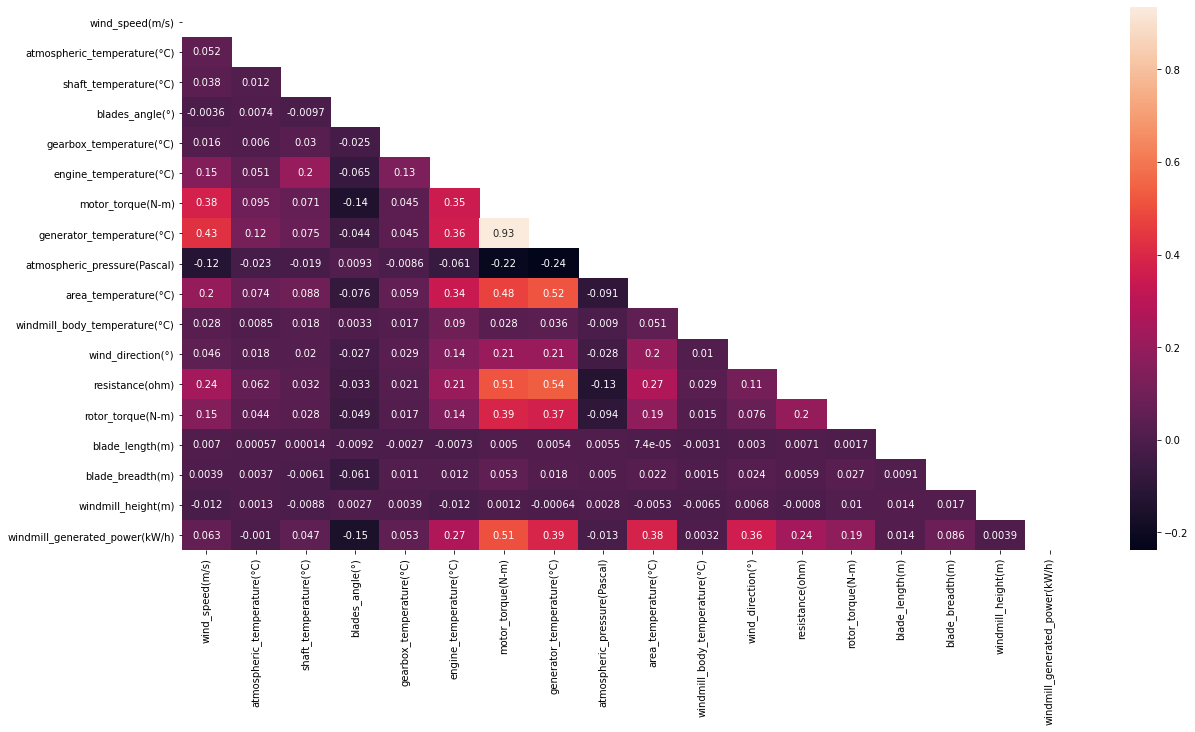

In [12]:
corr = df_train.corr()
plt.figure(figsize=(20,10))
mask = np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr,mask=mask,annot=True)
plt.show()

From the above plot, features **motor_torque(N-m)** and **generator_temperature(°C)** are highly correlated and therefore we will be dropping one of them in the end.

The highly correlated variables features contribute very less in predicting the output but increses the computational cost.

#### Differentiate Catetegorical and Numeirc Explanatory Variables <a class="anchor" id="diff_cat_num"></a>

In [13]:
## Spliting the train dataset into categorical and numerical features
def getFeatures(df):
    num_features = df.select_dtypes(include=[np.number])
    cat_features = df.select_dtypes(include=[np.object])
    return num_features,cat_features

In [14]:
num_features,cat_features = getFeatures(df_train)

In [15]:
num_features

,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),atmospheric_pressure(Pascal),area_temperature(°C),windmill_body_temperature(°C),wind_direction(°),resistance(ohm),rotor_torque(N-m),blade_length(m),blade_breadth(m),windmill_height(m),windmill_generated_power(kW/h)
0,94.82,-99.00,41.72,-0.90,82.41,42.52,2563.12,76.67,103402.96,26.90,nan,239.84,2730.31,42.08,2.22,0.31,24.28,6.77
1,241.83,27.76,-99.00,-99.00,44.10,46.26,2372.38,78.13,17030.90,39.80,nan,337.94,1780.21,107.89,4.21,0.45,27.26,5.97
2,95.48,nan,41.86,12.65,42.32,42.88,1657.17,67.65,16125.93,36.12,45.03,227.85,1666.05,-42.93,2.72,0.30,27.37,2.87
3,238.82,-99.00,45.44,15.12,44.76,47.28,2888.13,95.39,18689.73,46.02,44.83,492.08,1964.50,42.74,4.86,0.37,24.29,14.85
4,10.72,nan,41.98,1.72,-17.62,43.47,781.70,37.42,114468.17,34.57,-99.00,259.27,1177.52,13.39,nan,0.45,27.97,3.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28195,94.77,23.58,45.40,5.38,-1.09,48.53,2791.60,90.90,19428.73,45.43,44.24,536.15,1980.86,45.91,2.77,0.42,24.59,9.59
28196,94.20,24.03,42.07,-99.00,44.29,43.49,2207.88,72.24,16596.49,25.14,43.62,354.24,1712.84,36.97,-3.25,0.46,26.05,4.52
28197,94.16,28.67,45.00,9.55,49.38,44.04,2801.66,94.81,19083.88,45.13,43.58,534.21,1951.73,88.32,nan,0.38,28.53,11.10
28198,95.43,26.56,48.03,3.05,81.44,44.82,2760.65,90.14,18360.79,45.60,44.97,568.50,1968.92,47.56,3.00,0.35,47.75,9.37


In [16]:
cat_features

,tracking_id,datetime,turbine_status,cloud_level
0,WM_33725,2019-08-04 14:33:20,BA,Medium
1,WM_698,2018-11-05 10:13:20,A2,Medium
2,WM_39146,2019-09-14 14:03:20,ABC,Medium
3,WM_6757,2018-12-25 15:33:20,ABC,NaN
4,WM_21521,2019-05-04 03:13:20,AAA,Medium
...,...,...,...,...
28195,WM_7814,2019-01-02 02:43:20,BB,Medium
28196,WM_32512,2019-07-26 12:53:20,BB,Low
28197,WM_5193,2018-12-12 02:13:20,D,Medium
28198,WM_12173,2019-02-03 19:13:20,BCB,Low


We can observe that there are only 4 categorical exploratory variables in dataset: tracking_id, datetime, turbine_status and cloud_level

### Analyze Each Features and Remove Outliers <a class="anchor" id="remove_outlier"></a>

In dataset, outliers are considered as noises that could drag the performance of regression model. 

In [11]:
# make a copy of original train dataset
df_cpy = df_train.copy()

In [18]:
def comparing_train_and_test_feature(df,df_test,col):
    fig = plt.figure(figsize=(16,10))
    ax0 = fig.add_subplot(1,2,1)
    ax1 = fig.add_subplot(1,2,2)
    df[col].plot(kind='kde',ax=ax0)
    df_test[col].plot(kind='kde',ax=ax1)
    ax0.set_xlabel(col)
    ax1.set_xlabel(col)
    ax0.set_title("Density plot of " + str(col) + " of training set")
    ax1.set_title("Density plot of " + str(col) + " of testing set")
    plt.show()

#### wind_speed(m/s) <a class="anchor" id="wind_speed"></a>

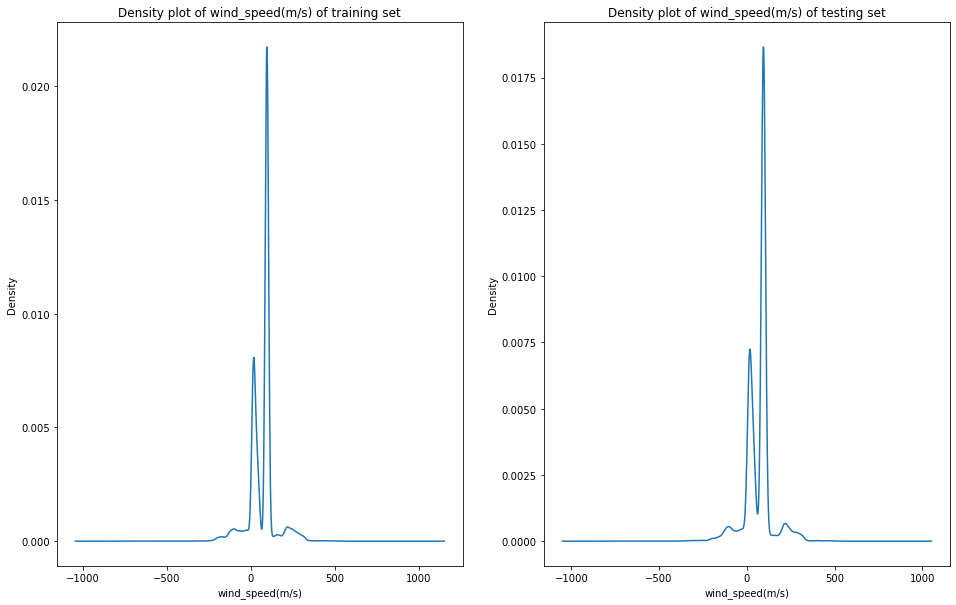

In [19]:
## Comparing the density plot of features in training and testing set
comparing_train_and_test_feature(df_train,df_test,'wind_speed(m/s)')
## Distribution of Feature wind_speed(m/s) of training and testing dataset are very similar

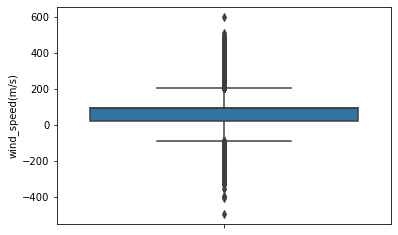

In [20]:
sns.boxplot(y='wind_speed(m/s)',data=df_train)

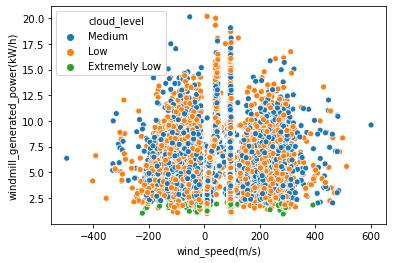

In [21]:
sns.scatterplot(x='wind_speed(m/s)',y='windmill_generated_power(kW/h)',hue='cloud_level',data=df_train)

From the above density plot of feature **wind_speed(m/s)**, we found that the distribution of **wind_speed(m/s)** is almost same in training and testing dataset, so we are not changing anything in it.

#### atmospheric_temperature(°C) <a class="anchor" id="atmos_temp"></a>

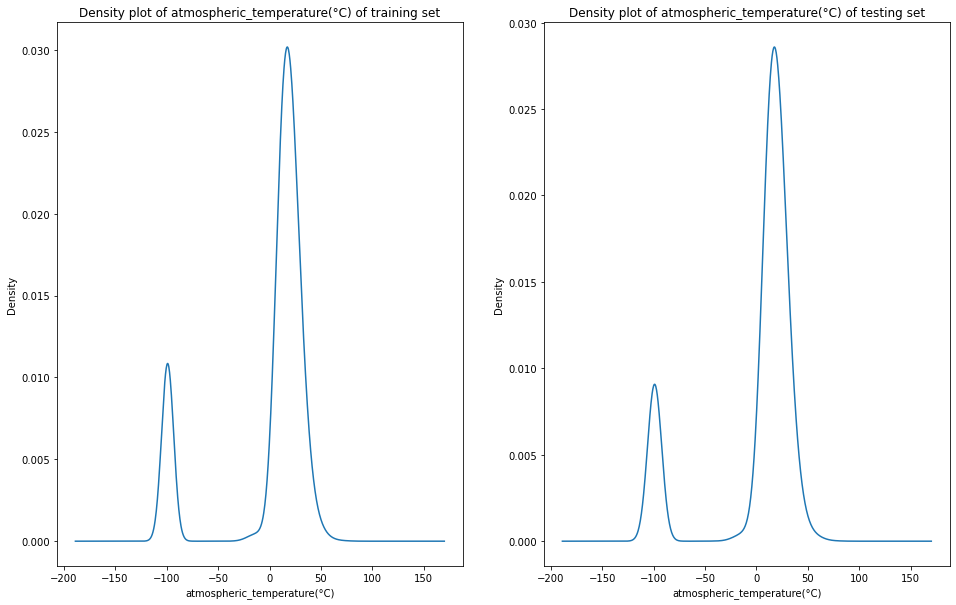

In [22]:
## Comparing the density plot of features in training and testing set
comparing_train_and_test_feature(df_train,df_test,'atmospheric_temperature(°C)')
## Distribution of Feature "atmospheric_temperature(°C)" of training and testing dataset is very similar

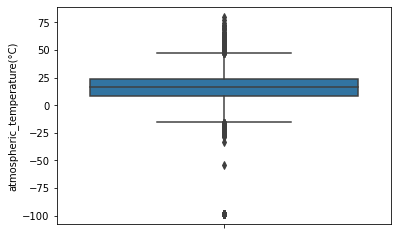

In [23]:
sns.boxplot(y='atmospheric_temperature(°C)',data=df_train)

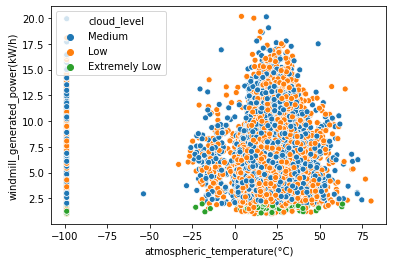

In [24]:
sns.scatterplot(x='atmospheric_temperature(°C)',y='windmill_generated_power(kW/h)',hue='cloud_level',data=df_train)

From the above density plot of feature **atmospheric_temperature(°C)**, we found that the distribution of **atmospheric_temperature(°C)** is almost same in training and testing dataset, so we are not changing anything in it.

#### shaft_temperature(°C) <a class="anchor" id="shaft_temp"></a>

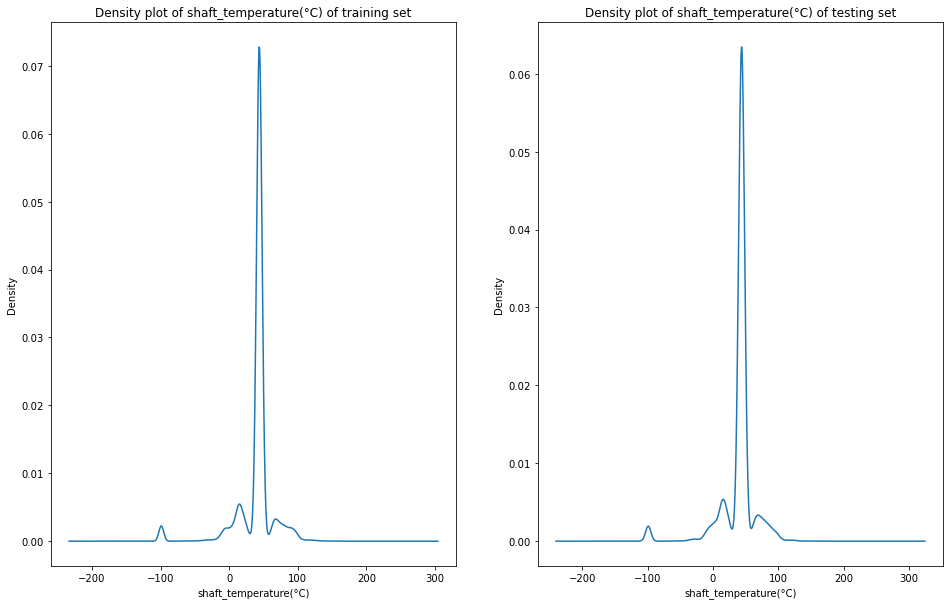

In [25]:
## Comparing the density plot of features in training and testing set
comparing_train_and_test_feature(df_train,df_test,'shaft_temperature(°C)')
## Distribution of Feature "shaft_temperature(°C)" of training and testing dataset are almost same

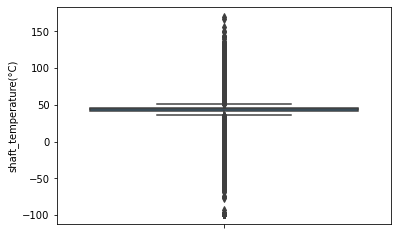

In [26]:
sns.boxplot(y='shaft_temperature(°C)',data=df_train)

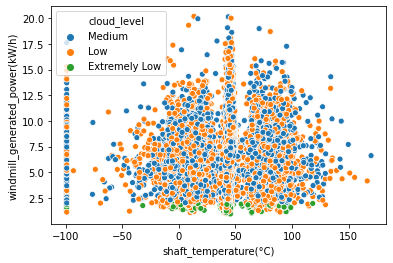

In [27]:
sns.scatterplot(x='shaft_temperature(°C)',y='windmill_generated_power(kW/h)',hue='cloud_level',data=df_train)

From the above density plot of feature **shaft_temperature(°C)**, we found that the distribution of **shaft_temperature(°C)** is almost same in training and testing dataset, so we are not changing anything in it

#### blades_angle(°) <a class="anchor" id="blade_angle"></a>

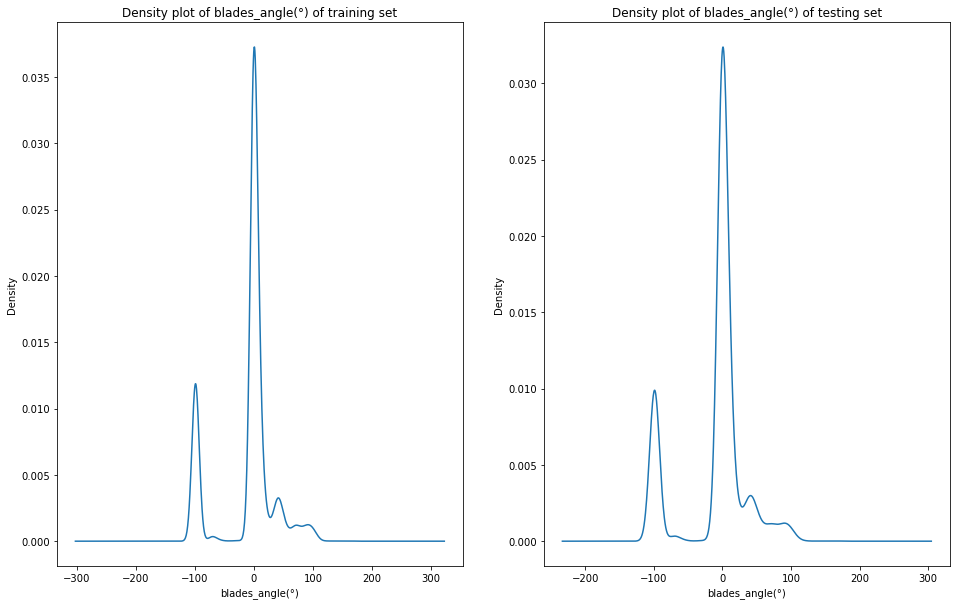

In [28]:
## Comparing the density plot of features in training and testing set
comparing_train_and_test_feature(df_train,df_test,'blades_angle(°)')
## Distribution of Feature "blades_angle(°)" of training and testing dataset are almost same

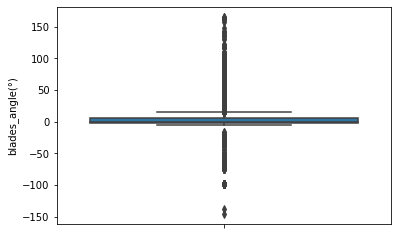

In [29]:
sns.boxplot(y='blades_angle(°)',data=df_train)

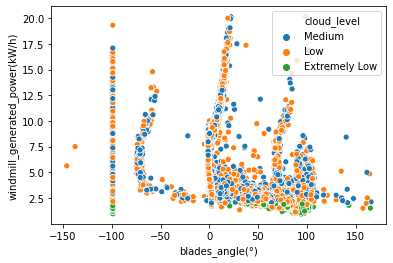

In [30]:
sns.scatterplot(x='blades_angle(°)',y='windmill_generated_power(kW/h)',hue='cloud_level',data=df_train)

From the above density plot of feature **blades_angle(°)**, we found that the distribution of **blades_angle(°)** is almost same in training and testing dataset, so we are not changing anything in it.

#### gearbox_temperature(°C) <a class="anchor" id="gear_temp"></a>

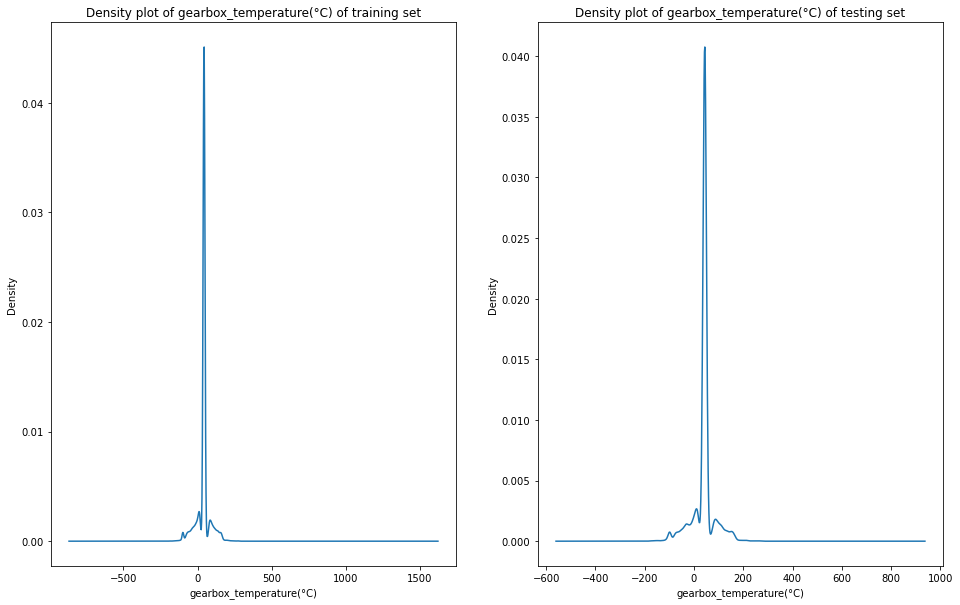

In [31]:
## Comparing the density plot of features in training and testing set
comparing_train_and_test_feature(df_train,df_test,'gearbox_temperature(°C)')
## Distribution of Feature "gearbox_temperature(°C)" of training and testing dataset are almost similar

The curve seems to have some differ, lets look at the boxplot

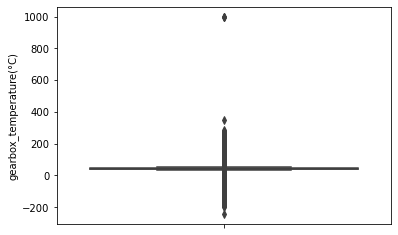

In [32]:
sns.boxplot(y='gearbox_temperature(°C)',data=df_train)

Outlier spotted around 1000°C

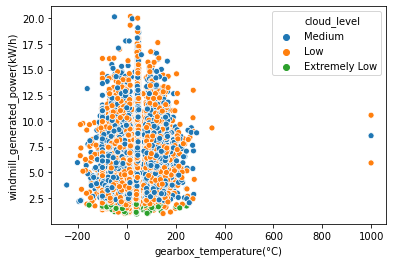

In [33]:
sns.scatterplot(x='gearbox_temperature(°C)',y='windmill_generated_power(kW/h)',hue='cloud_level',data=df_train)

In [12]:
## Here we are removing extreme outliers which are present in a very less number
low = df_cpy['gearbox_temperature(°C)'] < -200
high = df_cpy['gearbox_temperature(°C)'] > 300
low = np.where(low)
high = np.where(high)
df_cpy.drop(low[0],inplace=True)
df_cpy.drop(high[0],inplace=True)
df_cpy.index = range(df_cpy.shape[0])

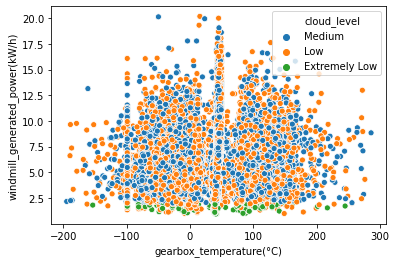

In [35]:
# After remove outliers
sns.scatterplot(x='gearbox_temperature(°C)',y='windmill_generated_power(kW/h)',hue='cloud_level',data=df_cpy)

#### engine_temperature(°C) <a class="anchor" id="engine_temp"></a>

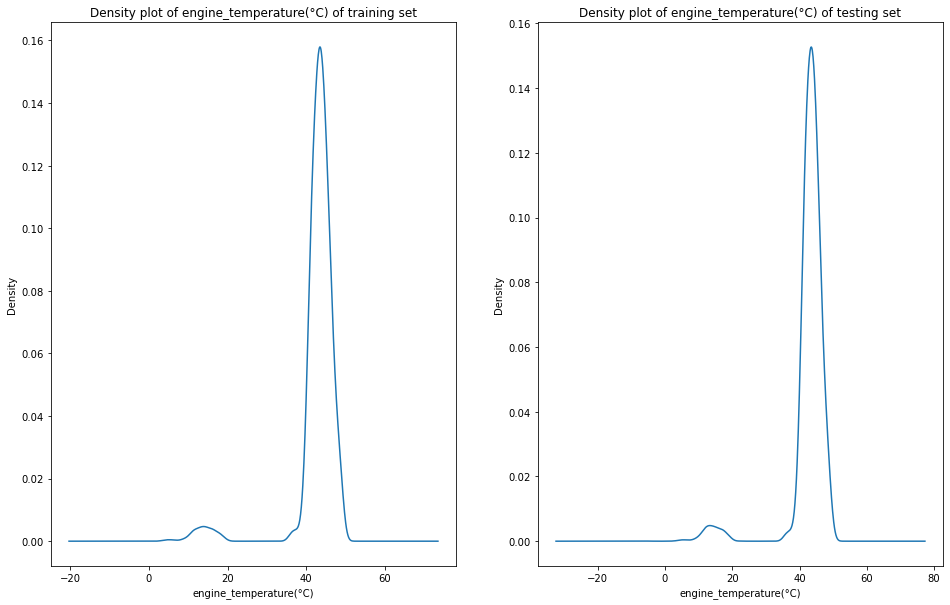

In [36]:
## Comparing the density plot of features in training and testing set
comparing_train_and_test_feature(df_train,df_test,'engine_temperature(°C)')
## Distribution of Feature "engine_temperature(°C)" of training and testing dataset are almost similar

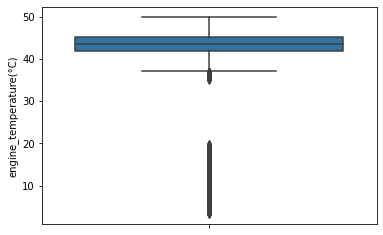

In [37]:
sns.boxplot(y='engine_temperature(°C)',data=df_train)

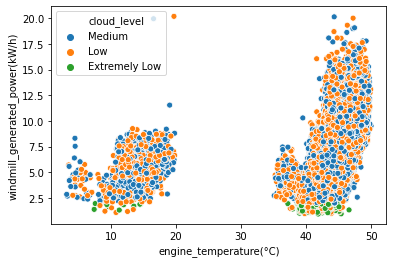

In [38]:
sns.scatterplot(x='engine_temperature(°C)',y='windmill_generated_power(kW/h)',hue='cloud_level',data=df_train)

In [13]:
## Dropping extreme outliers
low = df_cpy['engine_temperature(°C)'] < 38
low = np.where(low)
df_cpy.drop(low[0],inplace=True)
df_cpy.index = range(df_cpy.shape[0])

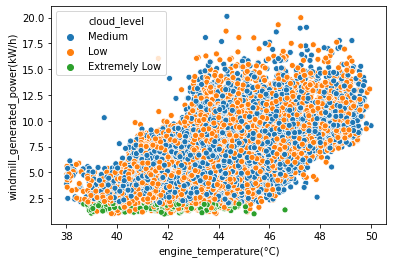

In [40]:
## After dropping outliers
sns.scatterplot(x='engine_temperature(°C)',y='windmill_generated_power(kW/h)',hue='cloud_level',data=df_cpy)

#### motor_torque(N-m)

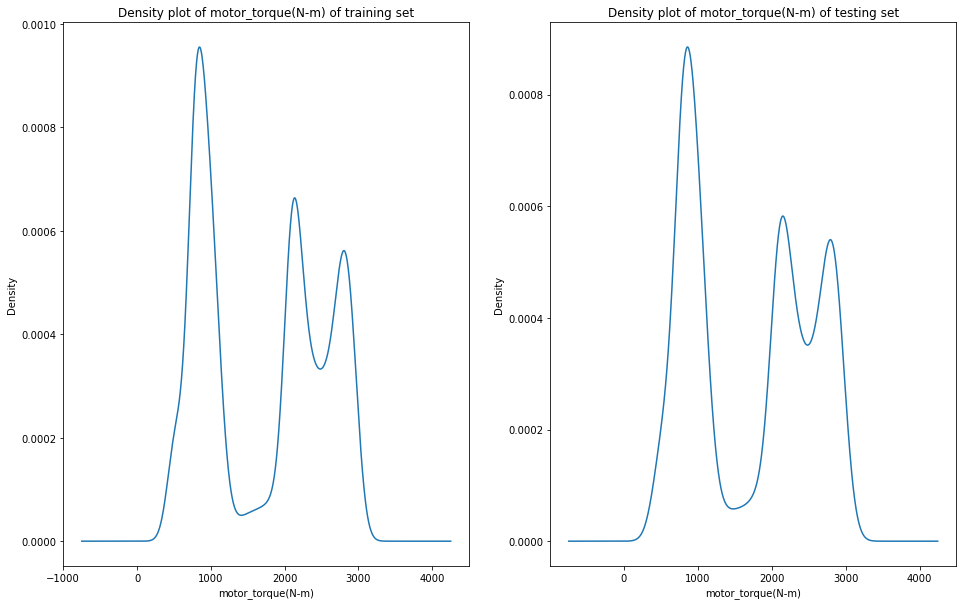

In [41]:
## Comparing the density plot of features in training and testing set
comparing_train_and_test_feature(df_train,df_test,'motor_torque(N-m)')
## Distribution of Feature "motor_torque(N-m)" of training and testing dataset are almost similar

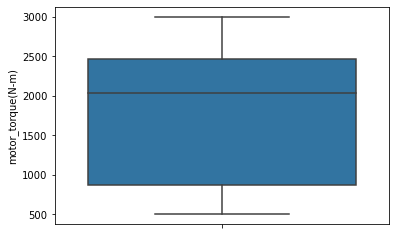

In [42]:
sns.boxplot(y='motor_torque(N-m)',data=df_train)

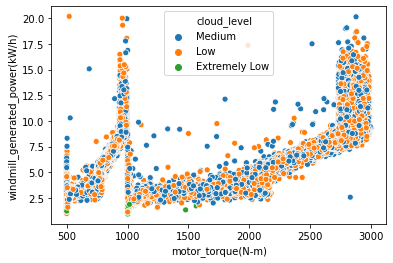

In [43]:
sns.scatterplot(x='motor_torque(N-m)',y='windmill_generated_power(kW/h)',hue='cloud_level',data=df_train)

From the above density plot of feature **motor_torque(N-m)**, we found that the distribution of **motor_torque(N-m)** is almost same in training and testing dataset, so we are not changing anything in it.

#### generator_temperature(°C) <a class="anchor" id="gen_temp"></a>

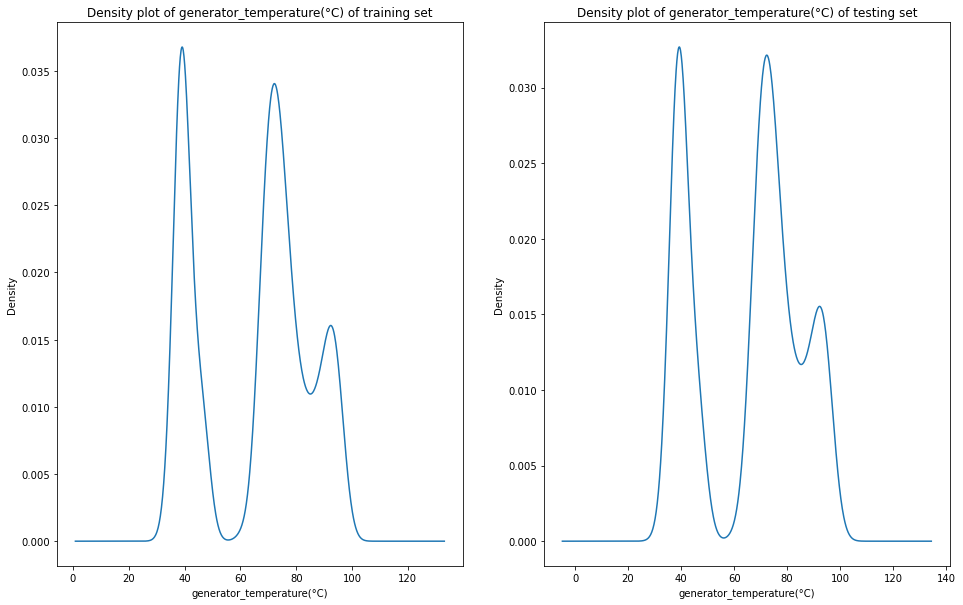

In [44]:
## Comparing the density plot of features in training and testing set
comparing_train_and_test_feature(df_train,df_test,'generator_temperature(°C)')
## Distribution of Feature "generator_temperature(°C)" of training and testing dataset are almost same

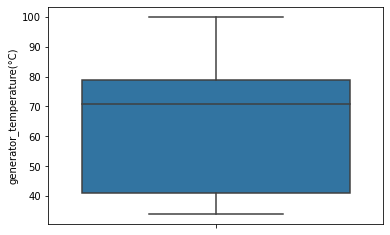

In [45]:
sns.boxplot(y='generator_temperature(°C)',data=df_train)

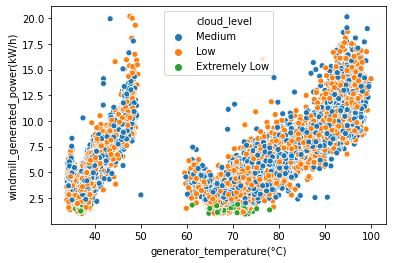

In [46]:
sns.scatterplot(x='generator_temperature(°C)',y='windmill_generated_power(kW/h)',hue='cloud_level',data=df_train)

From the above density plot of feature **generator_temperature(°C)**, we found that the distribution of **generator_temperature(°C)** is almost same in training and testing dataset, so we are not changing anything in it.

#### atmospheric_pressure(Pascal) <a class="anchor" id="atmos_pres"></a>

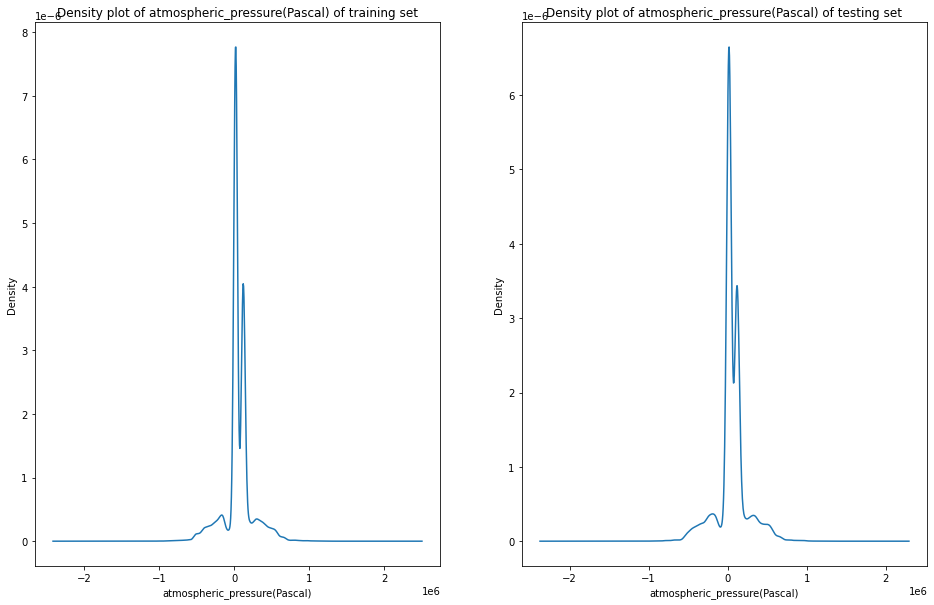

In [47]:
## Comparing the density plot of features in training and testing set
comparing_train_and_test_feature(df_train,df_test,'atmospheric_pressure(Pascal)')
## Distribution of Feature "atmospheric_pressure(Pascal)" of training and testing dataset are almost same

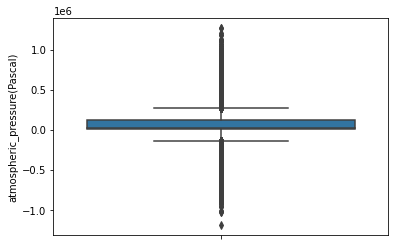

In [48]:
sns.boxplot(y='atmospheric_pressure(Pascal)',data=df_train)

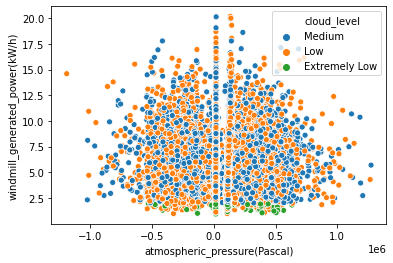

In [49]:
sns.scatterplot(x='atmospheric_pressure(Pascal)',y='windmill_generated_power(kW/h)',hue='cloud_level',data=df_train)

From the above density plot of feature **atmospheric_pressure(Pascal)**, we found that the distribution of **atmospheric_pressure(Pascal)** is almost same in training and testing dataset, so we are not changing anything in it.

#### area_temperature(°C) <a class="anchor" id="area_temp"></a>

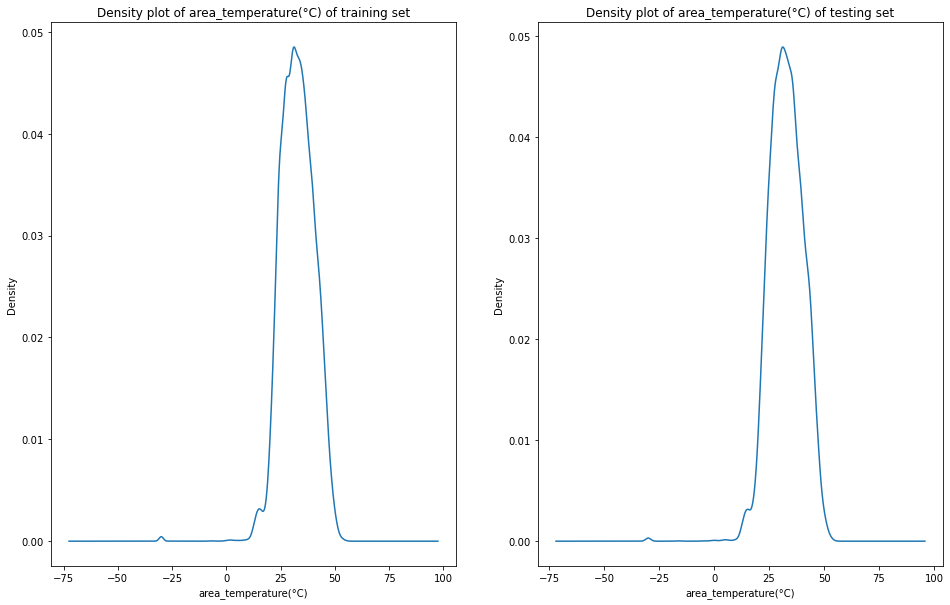

In [50]:
## Comparing the density plot of features in training and testing set
comparing_train_and_test_feature(df_train,df_test,'area_temperature(°C)')
## Distribution of Feature "area_temperature(°C)" of training and testing dataset are almost same

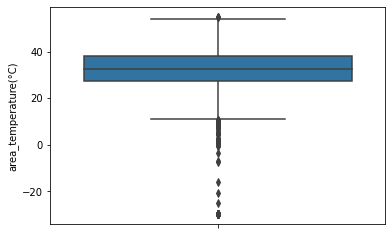

In [51]:
sns.boxplot(y='area_temperature(°C)',data=df_train)

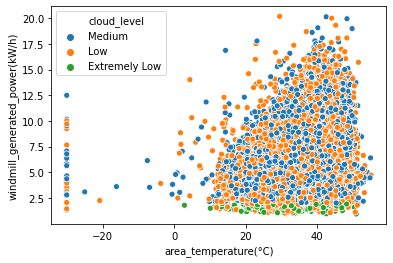

In [52]:
sns.scatterplot(x='area_temperature(°C)',y='windmill_generated_power(kW/h)',hue='cloud_level',data=df_train)

In [14]:
## Droping extreme outliers
low = df_cpy['area_temperature(°C)'] < 10
low = np.where(low)
df_cpy.drop(low[0],inplace=True)
df_cpy.index = range(df_cpy.shape[0])

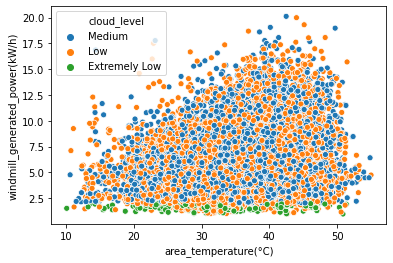

In [54]:
## After drop outliers
sns.scatterplot(x='area_temperature(°C)',y='windmill_generated_power(kW/h)',hue='cloud_level',data=df_cpy)

#### windmill_body_temperature(°C) <a class="anchor" id="windmill_body_temperature"></a>

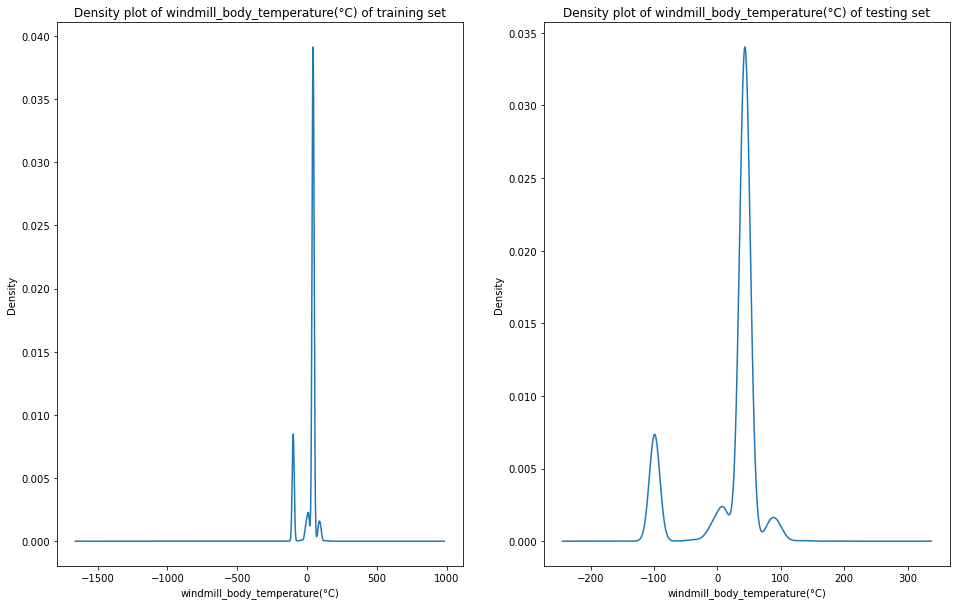

In [55]:
## Comparing the density plot of features in training and testing set
comparing_train_and_test_feature(df_train,df_test,'windmill_body_temperature(°C)')
## Distribution of Feature "windmill_body_temperature(°C)" of training and testing dataset is little bit different
## as density plot of windmill_body_temperature(°C) in testing dataset is broader than in training set

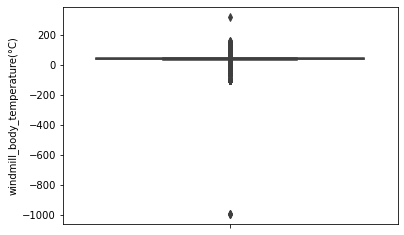

In [56]:
sns.boxplot(y='windmill_body_temperature(°C)',data=df_train)

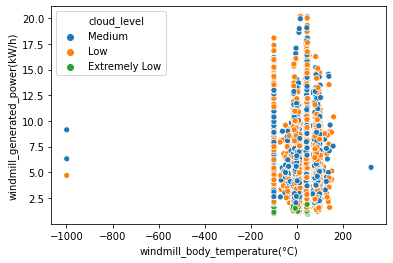

In [57]:
sns.scatterplot(x='windmill_body_temperature(°C)',y='windmill_generated_power(kW/h)',hue='cloud_level',data=df_train)

In [58]:
df_train[df_train['windmill_body_temperature(°C)']< -90]

,tracking_id,datetime,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),...,windmill_body_temperature(°C),wind_direction(°),resistance(ohm),rotor_torque(N-m),turbine_status,cloud_level,blade_length(m),blade_breadth(m),windmill_height(m),windmill_generated_power(kW/h)
4,WM_21521,2019-05-04 03:13:20,10.72,nan,41.98,1.72,-17.62,43.47,781.70,37.42,...,-99.00,259.27,1177.52,13.39,AAA,Medium,nan,0.45,27.97,3.52
7,WM_30330,2019-07-08 21:03:20,48.74,12.72,43.22,-99.00,-48.41,44.13,980.99,43.69,...,-99.00,nan,1177.64,18.38,BA,Low,2.94,0.35,29.94,8.54
9,WM_28915,2019-06-28 16:13:20,283.79,18.89,41.69,52.34,-62.72,41.88,1042.09,65.28,...,-99.00,352.27,1662.08,20.10,AC,Extremely Low,1.06,0.20,24.32,1.95
17,WM_16034,2019-03-06 02:53:20,95.30,26.34,13.39,8.34,45.36,44.08,2967.57,90.53,...,-99.00,475.33,1955.48,49.58,BCB,Medium,2.93,0.38,25.28,10.21
19,WM_4967,2018-12-10 11:23:20,96.32,26.87,46.04,-0.72,43.40,43.58,2628.13,81.97,...,-99.00,182.37,1890.10,46.66,BA,Medium,4.30,0.49,27.90,7.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28141,WM_19432,2019-04-08 00:03:20,93.56,22.40,44.20,-0.96,44.43,45.92,2196.44,74.14,...,-99.00,nan,-99.00,37.71,AC,Medium,3.57,0.45,37.00,5.98
28160,WM_34106,2019-08-07 07:33:20,-103.29,-99.00,62.29,-99.00,43.04,41.83,789.49,37.39,...,-99.00,275.36,1194.65,78.04,BCB,Low,nan,0.35,39.35,4.29
28175,WM_33879,2019-08-05 16:43:20,95.48,-99.00,42.84,-1.18,45.73,45.20,2325.05,78.09,...,-99.00,234.25,1782.52,38.60,BBB,Medium,nan,0.43,23.04,6.10
28181,WM_27205,2019-06-16 03:43:20,22.02,1.70,60.78,-1.08,12.23,12.64,825.72,40.21,...,-99.00,nan,1284.12,14.92,D,Low,3.98,0.46,26.14,6.24


This feature **windmill_body_temperature(°C)** doesn't have same distribution in training and testing set and it is not much correlated with targetFeature as well. So, we concluded to **drop** it in the end.

#### wind_direction(°) <a class="anchor" id="wind_direct"></a>

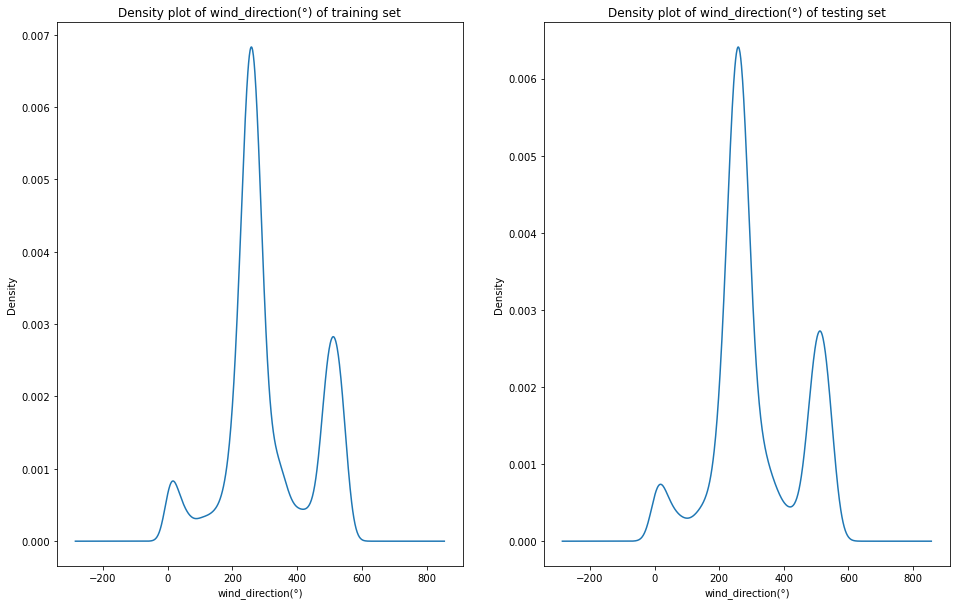

In [59]:
## Comparing the density plot of features in training and testing set
comparing_train_and_test_feature(df_train,df_test,'wind_direction(°)')
## Distribution of Feature "wind_direction(°)" of training and testing dataset is almost same

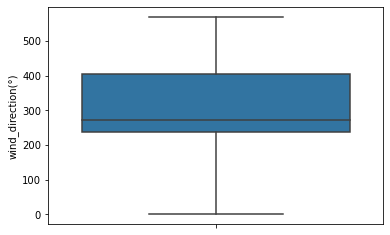

In [60]:
sns.boxplot(y='wind_direction(°)',data=df_train)

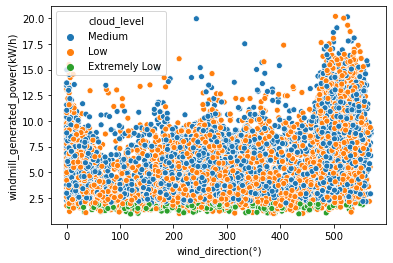

In [61]:
sns.scatterplot(x='wind_direction(°)',y='windmill_generated_power(kW/h)',hue='cloud_level',data=df_train)

From the above density plot of feature **wind_direction(°)**, we found that the distribution of **wind_direction(°)** is almost same in training and testing dataset, so we are not changing anything in it.

#### resistance(ohm) <a class="anchor" id="resist"></a>

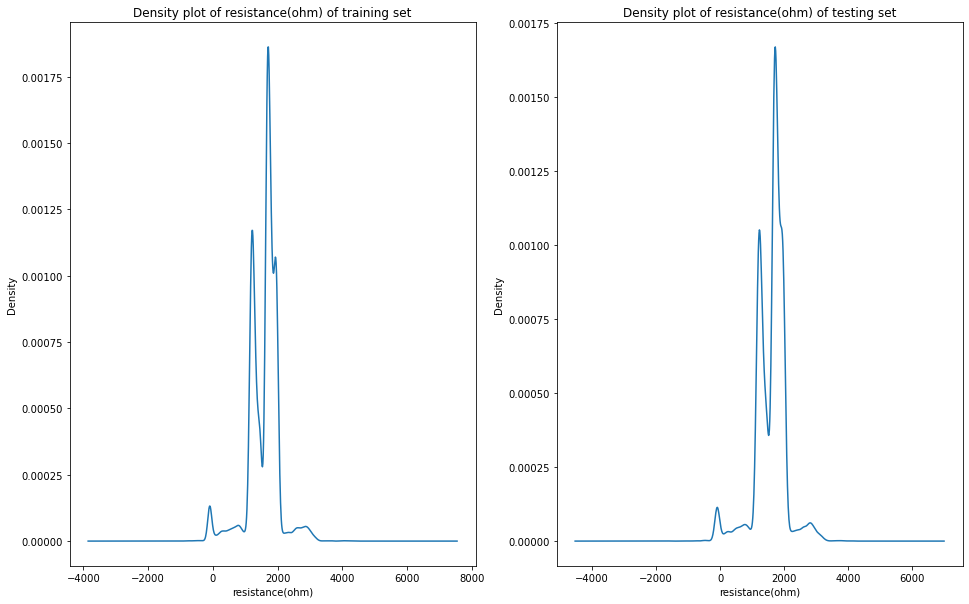

In [62]:
## Comparing the density plot of features in training and testing set
comparing_train_and_test_feature(df_train,df_test,'resistance(ohm)')
## Distribution of Feature "resistance(ohm)" of training and testing dataset is almost same

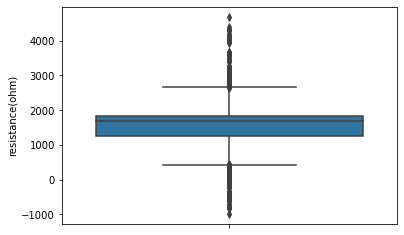

In [63]:
sns.boxplot(y='resistance(ohm)',data=df_train)

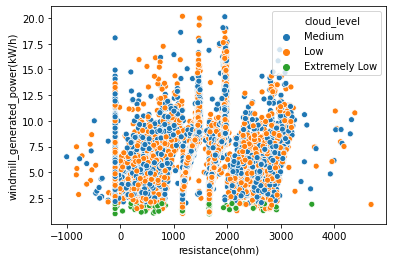

In [64]:
sns.scatterplot(x='resistance(ohm)',y='windmill_generated_power(kW/h)',hue='cloud_level',data=df_train)

From the above density plot of feature **resistance(ohm)**, we found that the distribution of **resistance(ohm)** is almost same in training and testing dataset, so we are not changing anything in it.

#### rotor_torque(N-m) <a class="anchor" id="rotor_torque"></a>

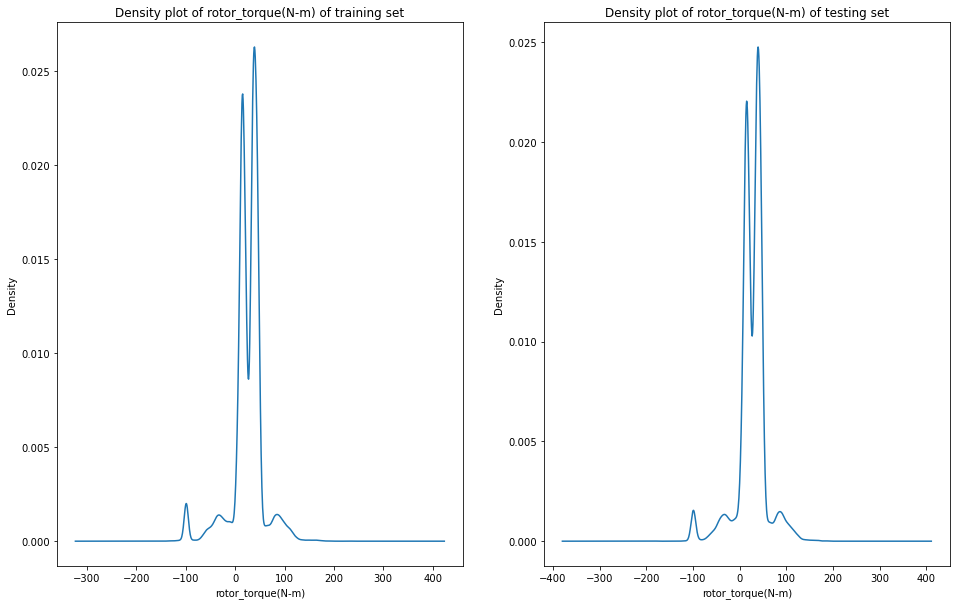

In [65]:
## Comparing the density plot of features in training and testing set
comparing_train_and_test_feature(df_train,df_test,'rotor_torque(N-m)')
## Distribution of Feature "rotor_torque(N-m)" of training and testing dataset is almost same

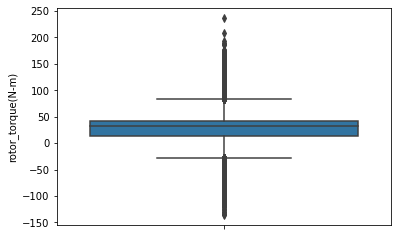

In [66]:
sns.boxplot(y='rotor_torque(N-m)',data=df_train)

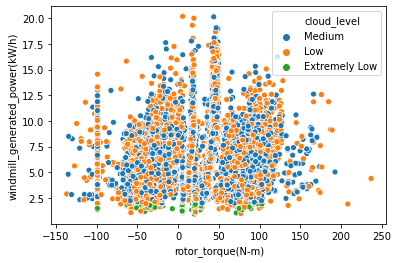

In [67]:
sns.scatterplot(x='rotor_torque(N-m)',y='windmill_generated_power(kW/h)',hue='cloud_level',data=df_train)

From the above density plot of feature **rotor_torque(N-m)**, we found that the distribution of **rotor_torque(N-m)** is almost same in training and testing dataset, so we are not changing anything in it.

#### blade_length(m) <a class="anchor" id="blade_len"></a>

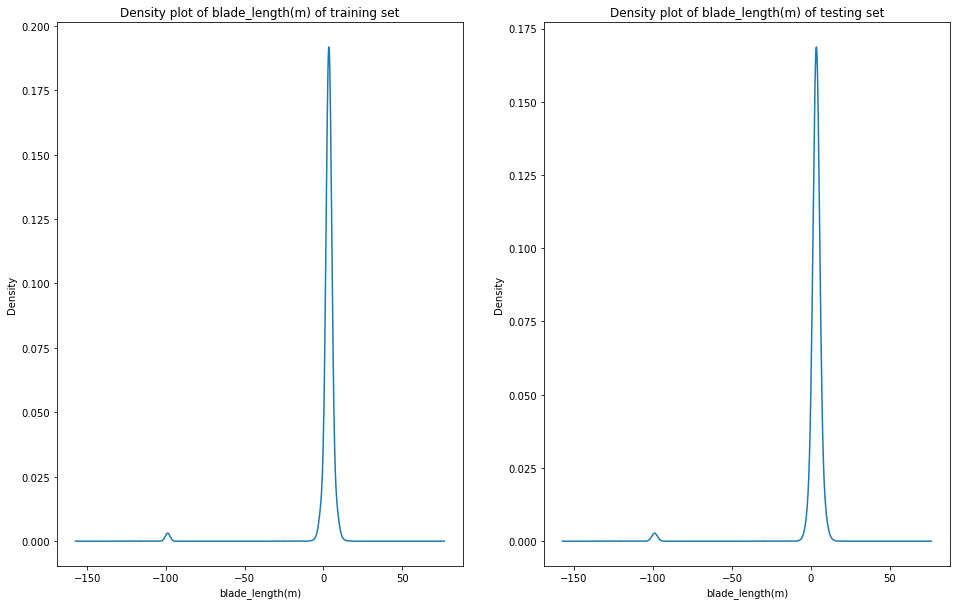

In [68]:
## Comparing the density plot of features in training and testing set
comparing_train_and_test_feature(df_train,df_test,'blade_length(m)')
## Distribution of Feature "blade_length(m)" of training and testing dataset is almost same

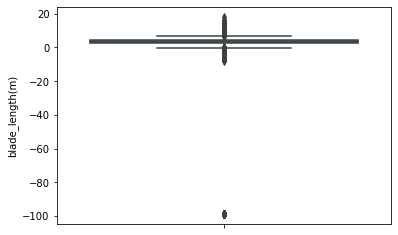

In [69]:
sns.boxplot(y='blade_length(m)',data=df_train)

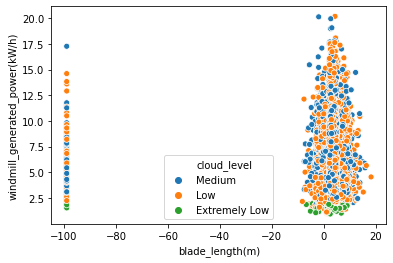

In [70]:
sns.scatterplot(x='blade_length(m)',y='windmill_generated_power(kW/h)',hue='cloud_level',data=df_train)

In [15]:
## Removing extreme outliers
low = df_cpy['blade_length(m)'] < -20
low = np.where(low)
df_cpy.drop(low[0],inplace=True)
df_cpy.index = range(df_cpy.shape[0])

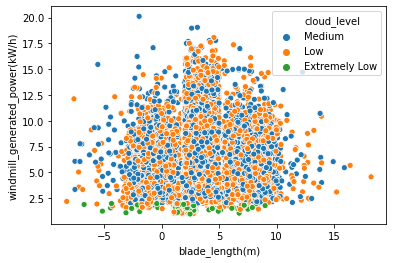

In [72]:
## After dropping outliers 
sns.scatterplot(x='blade_length(m)',y='windmill_generated_power(kW/h)',hue='cloud_level',data=df_cpy)

#### blade_breadth(m) <a class="anchor" id="blade_br"></a>

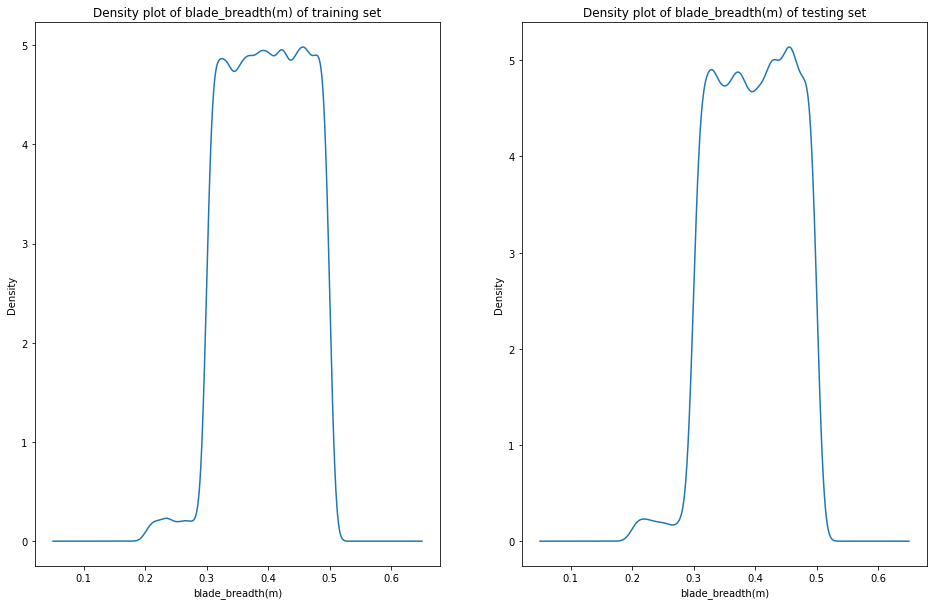

In [73]:
## Comparing the density plot of features in training and testing set
comparing_train_and_test_feature(df_train,df_test,'blade_breadth(m)')
## Distribution of Feature "blade_breadth(m)" of training and testing dataset is almost same

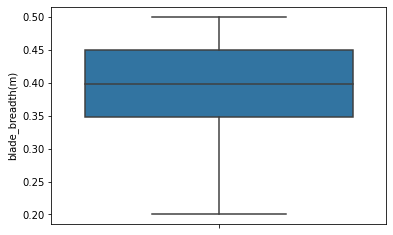

In [74]:
sns.boxplot(y='blade_breadth(m)',data=df_train)

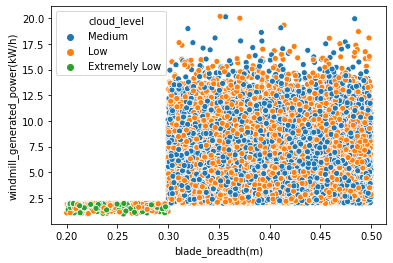

In [75]:
sns.scatterplot(x='blade_breadth(m)',y='windmill_generated_power(kW/h)',hue='cloud_level',data=df_train)

From the above density plot of feature **blade_breadth(m)**, we found that the distribution of **blade_breadth(m)** is almost same in training and testing dataset, so we are not changing anything in it.

#### windmill_height(m) <a class="anchor" id="windmill_h"></a>

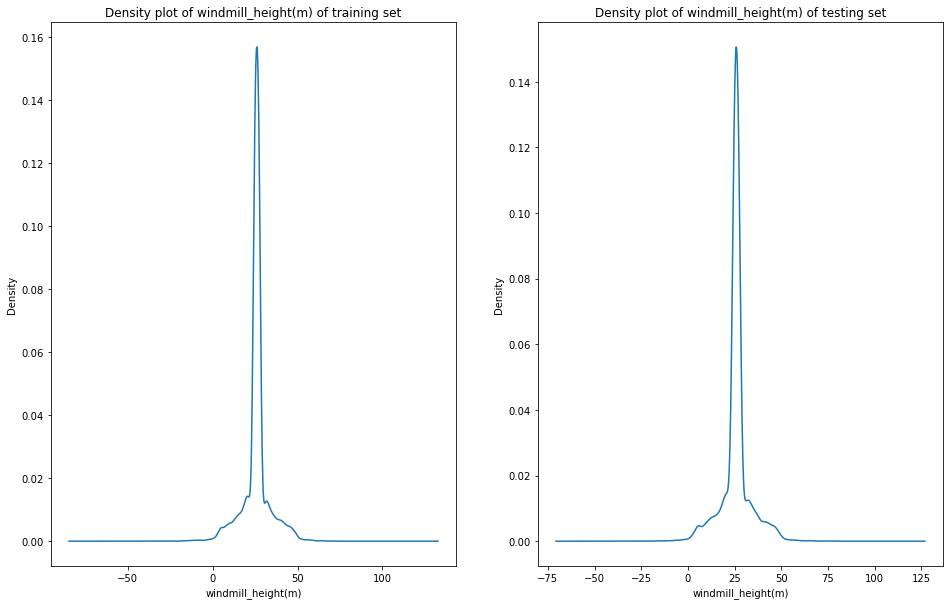

In [76]:
## Comparing the density plot of features in training and testing set
comparing_train_and_test_feature(df_train,df_test,'windmill_height(m)')
## Distribution of Feature "windmill_height(m)" of training and testing dataset is almost same

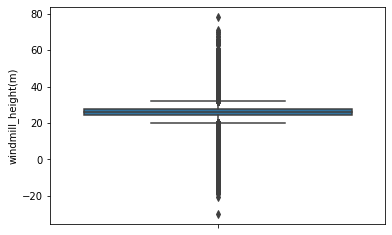

In [77]:
sns.boxplot(y='windmill_height(m)',data=df_train)

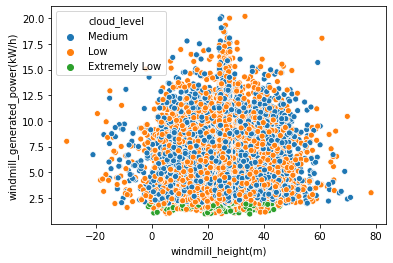

In [78]:
sns.scatterplot(x='windmill_height(m)',y='windmill_generated_power(kW/h)',hue='cloud_level',data=df_train)

From the above density plot of feature **windmill_height(m)**, we found that the distribution of **windmill_height(m)** is almost same in training and testing dataset, so we are not changing anything in it.

### Drop Columns <a class="anchor" id="drop_cols"></a>

- motor_torque(N-m) and generator_temperature(°C) is highly correlated, one of it must be dropped
- [windmill_body_temperature](#windmill_body_temperature) has to be dropped because of significant difference of density value in train and test set. 

In [16]:
df_cpy.drop(['generator_temperature(°C)','windmill_body_temperature(°C)'],inplace=True,axis=1)
df_test.drop(['generator_temperature(°C)','windmill_body_temperature(°C)'],inplace=True,axis=1)

### Check Missing Value <a class="anchor" id="check_mis"></a>

In [17]:
df_cpy.isnull().sum() #train dataset

tracking_id                          0
datetime                             0
wind_speed(m/s)                    257
atmospheric_temperature(°C)       3232
shaft_temperature(°C)                2
blades_angle(°)                    200
gearbox_temperature(°C)              1
engine_temperature(°C)               1
motor_torque(N-m)                    8
atmospheric_pressure(Pascal)      2526
area_temperature(°C)                 0
wind_direction(°)                 4960
resistance(ohm)                      0
rotor_torque(N-m)                  522
turbine_status                    1654
cloud_level                        261
blade_length(m)                   4839
blade_breadth(m)                     0
windmill_height(m)                 514
windmill_generated_power(kW/h)     200
dtype: int64

In [18]:
df_test.isnull().sum()

tracking_id                        0
datetime                           0
wind_speed(m/s)                  126
atmospheric_temperature(°C)     1427
shaft_temperature(°C)              1
blades_angle(°)                  106
gearbox_temperature(°C)            1
engine_temperature(°C)             5
motor_torque(N-m)                 11
atmospheric_pressure(Pascal)    1151
area_temperature(°C)               1
wind_direction(°)               2160
resistance(ohm)                    0
rotor_torque(N-m)                281
turbine_status                   797
cloud_level                      125
blade_length(m)                 2114
blade_breadth(m)                   0
windmill_height(m)               255
dtype: int64

#### Replace Missing Values  <a class="anchor" id="replace_mis"></a>

In [19]:
df_cpy['gearbox_temperature(°C)'].fillna(df_cpy['gearbox_temperature(°C)'].mean(),inplace=True)
df_cpy['area_temperature(°C)'].fillna(df_cpy['area_temperature(°C)'].mean(),inplace=True)
df_cpy['rotor_torque(N-m)'].fillna(df_cpy['rotor_torque(N-m)'].mean(),inplace=True)
df_cpy['blade_length(m)'].fillna(df_cpy['blade_length(m)'].mean(),inplace=True)
df_cpy['blade_breadth(m)'].fillna(df_cpy['blade_breadth(m)'].mean(),inplace=True)
df_cpy['windmill_height(m)'].fillna(df_cpy['windmill_height(m)'].mean(),inplace=True)
df_cpy['cloud_level'].fillna(df_cpy['cloud_level'].mode()[0],inplace=True)
df_cpy['atmospheric_temperature(°C)'].fillna(df_cpy['atmospheric_temperature(°C)'].mean(),inplace=True)
df_cpy['atmospheric_pressure(Pascal)'].fillna(df_cpy['atmospheric_pressure(Pascal)'].mean(),inplace=True)
df_cpy['wind_speed(m/s)'].fillna(df_cpy['wind_speed(m/s)'].mean(),inplace=True)
df_cpy['shaft_temperature(°C)'].fillna(df_cpy['shaft_temperature(°C)'].mean(),inplace=True)
df_cpy['blades_angle(°)'].fillna(df_cpy['blades_angle(°)'].mean(),inplace=True)
df_cpy['engine_temperature(°C)'].fillna(df_cpy['engine_temperature(°C)'].mean(),inplace=True)
df_cpy['motor_torque(N-m)'].fillna(df_cpy['motor_torque(N-m)'].mean(),inplace=True)
df_cpy['wind_direction(°)'].fillna(df_cpy['wind_direction(°)'].mean(),inplace=True)

In [20]:
df_test['gearbox_temperature(°C)'].fillna(df_test['gearbox_temperature(°C)'].mean(),inplace=True)
df_test['area_temperature(°C)'].fillna(df_test['area_temperature(°C)'].mean(),inplace=True)
df_test['rotor_torque(N-m)'].fillna(df_test['rotor_torque(N-m)'].mean(),inplace=True)
df_test['blade_length(m)'].fillna(df_test['blade_length(m)'].mean(),inplace=True)
df_test['blade_breadth(m)'].fillna(df_test['blade_breadth(m)'].mean(),inplace=True)
df_test['windmill_height(m)'].fillna(df_test['windmill_height(m)'].mean(),inplace=True)
df_test['cloud_level'].fillna(df_test['cloud_level'].mode()[0],inplace=True)
df_test['atmospheric_temperature(°C)'].fillna(df_test['atmospheric_temperature(°C)'].mean(),inplace=True)
df_test['atmospheric_pressure(Pascal)'].fillna(df_test['atmospheric_pressure(Pascal)'].mean(),inplace=True)
df_test['wind_speed(m/s)'].fillna(df_test['wind_speed(m/s)'].mean(),inplace=True)
df_test['shaft_temperature(°C)'].fillna(df_test['shaft_temperature(°C)'].mean(),inplace=True)
df_test['blades_angle(°)'].fillna(df_test['blades_angle(°)'].mean(),inplace=True)
df_test['engine_temperature(°C)'].fillna(df_test['engine_temperature(°C)'].mean(),inplace=True)
df_test['motor_torque(N-m)'].fillna(df_test['motor_torque(N-m)'].mean(),inplace=True)
df_test['wind_direction(°)'].fillna(df_test['wind_direction(°)'].mean(),inplace=True)

Check for missing value in train dataset again

In [21]:
df_cpy.isnull().sum()

tracking_id                          0
datetime                             0
wind_speed(m/s)                      0
atmospheric_temperature(°C)          0
shaft_temperature(°C)                0
blades_angle(°)                      0
gearbox_temperature(°C)              0
engine_temperature(°C)               0
motor_torque(N-m)                    0
atmospheric_pressure(Pascal)         0
area_temperature(°C)                 0
wind_direction(°)                    0
resistance(ohm)                      0
rotor_torque(N-m)                    0
turbine_status                    1654
cloud_level                          0
blade_length(m)                      0
blade_breadth(m)                     0
windmill_height(m)                   0
windmill_generated_power(kW/h)     200
dtype: int64

In [22]:
df_test.isnull().sum()

tracking_id                       0
datetime                          0
wind_speed(m/s)                   0
atmospheric_temperature(°C)       0
shaft_temperature(°C)             0
blades_angle(°)                   0
gearbox_temperature(°C)           0
engine_temperature(°C)            0
motor_torque(N-m)                 0
atmospheric_pressure(Pascal)      0
area_temperature(°C)              0
wind_direction(°)                 0
resistance(ohm)                   0
rotor_torque(N-m)                 0
turbine_status                  797
cloud_level                       0
blade_length(m)                   0
blade_breadth(m)                  0
windmill_height(m)                0
dtype: int64

#### Drop Categorical Value <a class="anchor" id="drop_cat"></a>

There are still some missing values in categorical response features, they should be dropped instead of replace

In [23]:
df_cpy.dropna(how='any',axis=0,inplace=True)

In [24]:
df_cpy.isnull().sum()

tracking_id                       0
datetime                          0
wind_speed(m/s)                   0
atmospheric_temperature(°C)       0
shaft_temperature(°C)             0
blades_angle(°)                   0
gearbox_temperature(°C)           0
engine_temperature(°C)            0
motor_torque(N-m)                 0
atmospheric_pressure(Pascal)      0
area_temperature(°C)              0
wind_direction(°)                 0
resistance(ohm)                   0
rotor_torque(N-m)                 0
turbine_status                    0
cloud_level                       0
blade_length(m)                   0
blade_breadth(m)                  0
windmill_height(m)                0
windmill_generated_power(kW/h)    0
dtype: int64

#### Convert String Categorical Value to Numeric Categorical Value <a class="anchor" id="conv_cat"></a>

In [25]:
## Feature "cloud_level" is categorical with 3 unique values
df_cpy['cloud_level'].replace(['Medium', 'Low', 'Extremely Low'],[2,1,0],inplace=True)
df_test['cloud_level'].replace(['Medium', 'Low', 'Extremely Low'],[2,1,0],inplace=True)

In [26]:
df_cpy['turbine_status'].value_counts()

AAA    1819
A      1815
B2     1813
BB     1799
BCB    1795
D      1780
B      1752
AC     1749
ABC    1745
A2     1745
AB     1740
BA     1733
BD     1724
BBB    1710
Name: turbine_status, dtype: int64

#### Using Dummy Variables for Feature *turbine_status* <a class="anchor" id="dummy"></a>

In [27]:
dum = ['turbine_status']
df_dum = pd.get_dummies(df_cpy[dum])
df_test_dum = pd.get_dummies(df_test[dum])
df_dum

,turbine_status_A,turbine_status_A2,turbine_status_AAA,turbine_status_AB,turbine_status_ABC,turbine_status_AC,turbine_status_B,turbine_status_B2,turbine_status_BA,turbine_status_BB,turbine_status_BBB,turbine_status_BCB,turbine_status_BD,turbine_status_D
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26556,0,0,0,0,0,0,0,0,0,1,0,0,0,0
26557,0,0,0,0,0,0,0,0,0,1,0,0,0,0
26558,0,0,0,0,0,0,0,0,0,0,0,0,0,1
26559,0,0,0,0,0,0,0,0,0,0,0,1,0,0


Merge datafram + dataframe with dummy status of turbine

In [28]:
df_cpy = pd.concat([df_cpy,df_dum],axis=1)
df_test = pd.concat([df_test,df_test_dum],axis=1)

### Handle DateTime <a class="anchor" id="datetime"></a>
Converting the feature "datetime" into pandas datetime format

In [29]:
df_cpy['datetime'] = pd.to_datetime(df_cpy['datetime'])
df_test['datetime'] = pd.to_datetime(df_test['datetime'])

In [30]:
df_test

,tracking_id,datetime,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),atmospheric_pressure(Pascal),...,turbine_status_ABC,turbine_status_AC,turbine_status_B,turbine_status_B2,turbine_status_BA,turbine_status_BB,turbine_status_BBB,turbine_status_BCB,turbine_status_BD,turbine_status_D
0,WM_19817,2019-04-17 08:53:20,94.32,17.64,89.71,51.15,40.46,39.59,1073.20,16681.04,...,0,0,0,0,1,0,0,0,0,0
1,WM_18723,2019-03-30 07:43:20,10.09,13.98,43.27,46.52,40.03,41.18,517.44,54283.32,...,0,0,0,0,0,0,0,0,0,0
2,WM_34552,2019-08-10 11:33:20,347.15,31.42,41.08,26.93,43.11,43.44,1480.72,214812.84,...,0,0,0,1,0,0,0,0,0,0
3,WM_28570,2019-06-26 03:53:20,24.47,-99.00,14.38,66.51,13.74,15.58,887.98,54283.32,...,0,0,0,0,0,0,1,0,0,0
4,WM_36934,2019-08-27 16:43:20,97.00,33.28,41.41,1.84,121.57,43.93,2053.92,16833.55,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12081,WM_13376,2019-02-12 11:33:20,-15.04,18.52,43.55,-1.09,44.55,44.49,2424.37,17239.35,...,0,0,0,0,0,0,0,0,0,0
12082,WM_1630,2018-11-12 17:33:20,97.59,-99.00,44.75,1.75,43.31,42.85,2085.63,17131.45,...,0,0,0,0,0,0,0,0,0,0
12083,WM_24703,2019-05-27 11:53:20,16.19,8.11,43.25,-0.69,214.90,41.18,788.69,118707.64,...,0,0,0,0,1,0,0,0,0,0
12084,WM_22893,2019-05-13 21:53:20,93.25,-99.00,43.84,-1.17,41.98,42.04,2079.86,17155.27,...,0,0,0,0,0,0,0,0,0,0


Extracting some informations for the feature "datetime" and making new features from it.

Date and time is also a very important exploratory variable in dataset because it helps to differentiate if the reading was taken during which season of the year. There might be a windy season in that particular location where strong wind will visit the place. 

In [31]:
df_cpy['dmonth'] = df_cpy['datetime'].dt.month
df_cpy['dday'] = df_cpy['datetime'].dt.day
df_cpy['ddayofweek'] = df_cpy['datetime'].dt.dayofweek

df_test['dmonth'] = df_test['datetime'].dt.month
df_test['dday'] = df_test['datetime'].dt.day
df_test['ddayofweek'] = df_test['datetime'].dt.dayofweek

In [32]:
X = df_cpy.drop(['tracking_id','datetime','windmill_generated_power(kW/h)','turbine_status'],axis=1)
Y = df_cpy['windmill_generated_power(kW/h)']
X_test = df_test.drop(['tracking_id','datetime','turbine_status'],axis=1)
print(X.shape,Y.shape)
print(X_test.shape)

(24719, 33) (24719,)
(12086, 33)


In [33]:
X_test.iloc[0] # check first row of test dataset

wind_speed(m/s)                   94.32
atmospheric_temperature(°C)       17.64
shaft_temperature(°C)             89.71
blades_angle(°)                   51.15
gearbox_temperature(°C)           40.46
engine_temperature(°C)            39.59
motor_torque(N-m)               1073.20
atmospheric_pressure(Pascal)   16681.04
area_temperature(°C)              24.00
wind_direction(°)                445.98
resistance(ohm)                 1664.22
rotor_torque(N-m)                 21.91
cloud_level                        2.00
blade_length(m)                    3.19
blade_breadth(m)                   0.40
windmill_height(m)                25.57
turbine_status_A                   0.00
turbine_status_A2                  0.00
turbine_status_AAA                 0.00
turbine_status_AB                  0.00
turbine_status_ABC                 0.00
turbine_status_AC                  0.00
turbine_status_B                   0.00
turbine_status_B2                  0.00
turbine_status_BA                  1.00


### Train Test Split <a class="anchor" id="split"></a>

Since test dataset does not have target variable, it is not suitable to use for determine test score in model prediction later. 80% from train dataset is being used as train samples while 20% used as test samples. 

In [34]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,train_size=0.8,random_state=42)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(19775, 33) (19775,)
(4944, 33) (4944,)


### Regression Models <a class="anchor" id="Models"></a>

Define a function to show performance of regression model

In [38]:
def result_evaluation(model, title, x_train, y_train, x_test, y_test):
    model.fit(x_train,y_train)
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    print("Train R2 = ", r2_score(y_true=y_train,y_pred=y_train_pred))
    print("Test R2 = ", r2_score(y_true=y_test,y_pred=y_test_pred))
    print("Train MSE = ", mean_squared_error(y_true=y_train,y_pred=y_train_pred))
    print("Test MSE = ", mean_squared_error(y_true=y_test,y_pred=y_test_pred))
    print("Train RMSE = ", np.sqrt(mean_squared_error(y_true=y_train,y_pred=y_train_pred)))
    print("Test RMSE = ", np.sqrt(mean_squared_error(y_true=y_test,y_pred=y_test_pred)))
    print("Train MAE = ", mean_absolute_error(y_true=y_train,y_pred=y_train_pred))
    print("Test MAE = ", mean_absolute_error(y_true=y_test,y_pred=y_test_pred))

    fig = plt.figure()
    sns.regplot(x=y_test, y=y_test_pred, ci=68, fit_reg=True, line_kws={"color": "red"})
    plt.scatter(y_test, y_test_pred)
    fig.suptitle(title)               
    plt.xlabel('y_test')                          
    plt.ylabel('y_test_pred') 
    plt.show()

#### Ridge Regression <a class="anchor" id="ridge"></a>

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.0356e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.99448e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.98066e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.98912e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.97614e-19): result may not be accurate.
  re

Train R2 =  0.5139112557563614
Test R2 =  0.5299123876721765
Train MSE =  3.640046269352529
Test MSE =  3.4739927083981654
Train RMSE =  1.9078905286605228
Test RMSE =  1.86386499199866
Train MAE =  1.4941197934821886
Test MAE =  1.4663995421153317


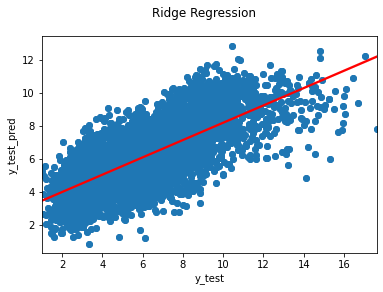

alpha chosen =  1.0


In [41]:
ridge_model = RidgeCV(scoring="r2",
                          alphas=[0.0001,0.0005,0.001,0.005,0.01,0.1,1.0,10],cv=5)
result_evaluation(ridge_model, "Ridge Regression", x_train, y_train, x_test, y_test)
print("alpha chosen = ", ridge_model.alpha_)

#### Lasso Regression <a class="anchor" id="lasso"></a>

Train R2 =  0.513853628681862
Test R2 =  0.5300658315802553
Train MSE =  3.6404778062272856
Test MSE =  3.4728587431460847
Train RMSE =  1.9080036179806592
Test RMSE =  1.8635607699096064
Train MAE =  1.4941827982133002
Test MAE =  1.4658783416507204


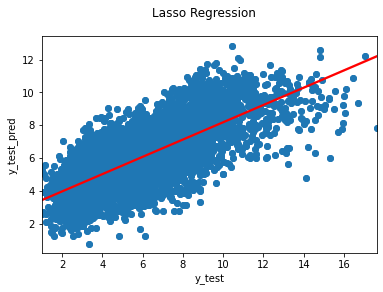

alpha chosen =  0.001


In [42]:
lasso_model = LassoCV(alphas=[0.0001,0.0005,0.001,0.005,0.01,0.1,1.0,10],cv=5)
result_evaluation(lasso_model, "Lasso Regression", x_train, y_train, x_test, y_test)
print("alpha chosen = ", lasso_model.alpha_)

#### Linear Regression

Train R2 =  0.513911536559236
Test R2 =  0.5298980675461322
Train MSE =  3.6400441665771233
Test MSE =  3.47409853550817
Train RMSE =  1.9078899775870524
Test RMSE =  1.8638933809389877
Train MAE =  1.4941209492526526
Test MAE =  1.4664261784434665


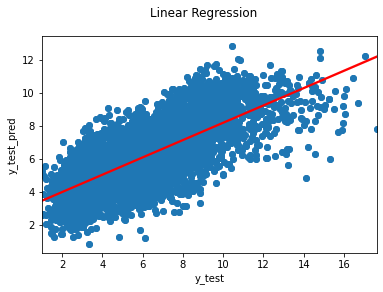

In [43]:
result_evaluation(LinearRegression(), "Linear Regression", 
                  x_train, y_train, x_test, y_test)

#### Pipeline: Original Models <a class="anchor" id="pipe_ori"></a>

In [62]:
from sklearn.base import BaseEstimator
class ClfSwitcher(BaseEstimator):

    def __init__(
        self, 
        estimator = LinearRegression(),
    ):
        """
        A Custom BaseEstimator that can switch between classifiers.
        :param estimator: sklearn object - The classifier
        """ 

        self.estimator = estimator


    def fit(self, X, y=None, **kwargs):
        self.estimator.fit(X, y)
        return self


    def predict(self, X, y=None):
        return self.estimator.predict(X)


    def predict_proba(self, X):
        return self.estimator.predict_proba(X)


    def score(self, X, y):
        return self.estimator.score(X, y)

In [143]:
%%time
pipeline = Pipeline([
    ('clf', ClfSwitcher()),
])

parameters = [
    {
        'clf__estimator': [LinearRegression()],
    },
    {
        'clf__estimator': [Ridge()],
        'clf__estimator__alpha': (0.0001,0.0005,0.001,0.005,0.01,0.1,1.0,10),
    },
    {
        'clf__estimator': [Lasso()],
        'clf__estimator__alpha': (0.0001,0.0005,0.001,0.005,0.01,0.1,1.0,10),
    },
    {
        'clf__estimator': [GradientBoostingRegressor()],
    },
    {
        'clf__estimator': [DecisionTreeRegressor()],
        'clf__estimator__min_samples_leaf': [2],
    },
    {
        'clf__estimator': [XGBRegressor()],
    },
    {
        'clf__estimator': [RandomForestRegressor()],
    },
]


original_pipe = GridSearchCV(pipeline, parameters, scoring='r2')
original_pipe.fit(x_train, y_train)
# result_evaluation(LinearRegression(), "Linear Regression", x_train, y_train, x_test, y_test)

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.0356e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.99448e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.98066e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.98912e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.97614e-19): result may not be accurate.
  re

Wall time: 5min 6s


GridSearchCV(estimator=Pipeline(steps=[('clf', ClfSwitcher())]),
             param_grid=[{'clf__estimator': [LinearRegression()]},
                         {'clf__estimator': [Ridge()],
                          'clf__estimator__alpha': (0.0001, 0.0005, 0.001,
                                                    0.005, 0.01, 0.1, 1.0,
                                                    10)},
                         {'clf__estimator': [Lasso()],
                          'clf__estimator__alpha': (0.0001, 0.0005, 0.001,
                                                    0.005, 0.01, 0.1, 1.0,
                                                    10)},
                         {'clf__estimator': [GradientBoostingRegres...
                                                          max_delta_step=None,
                                                          max_depth=None,
                                                          min_child_weight=None,
                                     

In [147]:
original_pipe.best_estimator_

Pipeline(steps=[('clf', ClfSwitcher(estimator=RandomForestRegressor()))])

In [148]:
original_pipe.best_score_

0.9596232785101126

In [149]:
original_pipe.best_params_

{'clf__estimator': RandomForestRegressor()}

#### Best: Random Forest Regressor <a class="anchor" id="rf"></a>

Train R2 =  0.9944597656123683
Test R2 =  0.9692432775061032
Train MSE =  0.041487711354882904
Test MSE =  0.22729514004617257
Train RMSE =  0.20368532434832634
Test RMSE =  0.47675480075839044
Train MAE =  0.1119513572941565
Test MAE =  0.2894380567806191


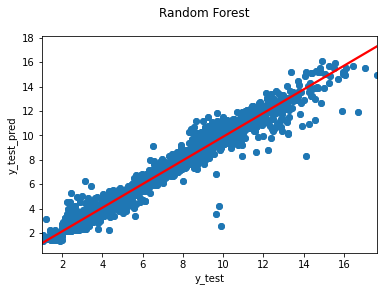

Wall time: 36.9 s


In [44]:
%%time

result_evaluation(RandomForestRegressor(), "Random Forest", x_train, y_train, x_test, y_test)

#### Pipeline: Original Models + Cross Validation <a class="anchor" id="pipe_ori_cv"></a>

In [63]:
%%time
pipeline = Pipeline([
    ('clf', ClfSwitcher()),
])

parameters = [
    {
        'clf__estimator': [LinearRegression()],
    },
    {
        'clf__estimator': [Ridge()],
        'clf__estimator__alpha': (0.0001,0.0005,0.001,0.005,0.01,0.1,1.0,10),
    },
    {
        'clf__estimator': [Lasso()],
        'clf__estimator__alpha': (0.0001,0.0005,0.001,0.005,0.01,0.1,1.0,10),
    },
    {
        'clf__estimator': [GradientBoostingRegressor()],
    },
    {
        'clf__estimator': [DecisionTreeRegressor()],
        'clf__estimator__min_samples_leaf': [2],
    },
    {
        'clf__estimator': [XGBRegressor()],
    },
    {
        'clf__estimator': [RandomForestRegressor()],
    },
]


original_pipe_cv = GridSearchCV(pipeline, parameters, scoring='r2', cv=5)
original_pipe_cv.fit(x_train, y_train)
# result_evaluation(LinearRegression(), "Linear Regression", x_train, y_train, x_test, y_test)

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.0356e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.99448e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.98066e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.98912e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.97614e-19): result may not be accurate.
  re

Wall time: 5min 10s


GridSearchCV(cv=5, estimator=Pipeline(steps=[('clf', ClfSwitcher())]),
             param_grid=[{'clf__estimator': [LinearRegression()]},
                         {'clf__estimator': [Ridge()],
                          'clf__estimator__alpha': (0.0001, 0.0005, 0.001,
                                                    0.005, 0.01, 0.1, 1.0,
                                                    10)},
                         {'clf__estimator': [Lasso()],
                          'clf__estimator__alpha': (0.0001, 0.0005, 0.001,
                                                    0.005, 0.01, 0.1, 1.0,
                                                    10)},
                         {'clf__estimator': [GradientBoostingR...
                                                          max_delta_step=None,
                                                          max_depth=None,
                                                          min_child_weight=None,
                                    

In [64]:
original_pipe_cv.best_estimator_

Pipeline(steps=[('clf', ClfSwitcher(estimator=RandomForestRegressor()))])

In [65]:
original_pipe_cv.best_score_

0.9592506776638485

In [66]:
original_pipe_cv.best_params_

{'clf__estimator': RandomForestRegressor()}

In [67]:
%%time

mean_cv_rf = cross_val_score(RandomForestRegressor(), x_train, y_train, scoring='r2', cv=5).mean()
mean_cv_rf

Wall time: 2min 57s


0.9601819428377357

#### Pipeline: Original Models + Scaler <a class="anchor" id="pipe_scale"></a>

In [158]:
%%time
pipeline = Pipeline([
    ('preprocessor', RobustScaler()),
    ('clf', ClfSwitcher()),
])

parameters = [
    {
        'clf__estimator': [LinearRegression()],
    },
    {
        'clf__estimator': [Ridge()],
        'clf__estimator__alpha': (0.0001,0.0005,0.001,0.005,0.01,0.1,1.0,10),
    },
    {
        'clf__estimator': [Lasso()],
        'clf__estimator__alpha': (0.0001,0.0005,0.001,0.005,0.01,0.1,1.0,10),
    },
    {
        'clf__estimator': [GradientBoostingRegressor()],
    },
    {
        'clf__estimator': [DecisionTreeRegressor()],
        'clf__estimator__min_samples_leaf': [2],
    },
    {
        'clf__estimator': [XGBRegressor()],
    },
    {
        'clf__estimator': [RandomForestRegressor()],
    },
]


scaler_pipe = GridSearchCV(pipeline, parameters, scoring='r2')
scaler_pipe.fit(x_train, y_train)
# result_evaluation(LinearRegression(), "Linear Regression", x_train, y_train, x_test, y_test)

Wall time: 5min 1s


GridSearchCV(estimator=Pipeline(steps=[('preprocessor', RobustScaler()),
                                       ('clf', ClfSwitcher())]),
             param_grid=[{'clf__estimator': [LinearRegression()]},
                         {'clf__estimator': [Ridge()],
                          'clf__estimator__alpha': (0.0001, 0.0005, 0.001,
                                                    0.005, 0.01, 0.1, 1.0,
                                                    10)},
                         {'clf__estimator': [Lasso()],
                          'clf__estimator__alpha': (0.0001, 0.0005, 0.001,
                                                    0.005, 0.01, 0.1, 1.0,
                                                    10)},
                         {'clf__es...
                                                          max_delta_step=None,
                                                          max_depth=None,
                                                          min_child_weight=Non

In [159]:
scaler_pipe.best_estimator_

Pipeline(steps=[('preprocessor', RobustScaler()),
                ('clf', ClfSwitcher(estimator=RandomForestRegressor()))])

In [160]:
scaler_pipe.best_params_

{'clf__estimator': RandomForestRegressor()}

In [161]:
scaler_pipe.best_score_

0.9596556280982045

The result is just 0.01 better than without scaler.

#### Best: Random Forest Regressor + Scaler <a class="anchor" id="rf_scale"></a>

**Robust Scaler** is chosen over Standard Scaler because it gives better r-squared and lower RMSE and MAE score.<br>
Robust Scaler removes the median and scales the data according to the quantile range. Standardization of a dataset is a common requirement for many machine learning estimators. Typically this is done by removing the mean and scaling to unit variance. However, outliers can often influence the sample mean / variance in a negative way. In such cases, the *median* and the *interquartile range* often give better results.

Train R2 =  0.9945021662983651
Test R2 =  0.9688743804742665
Train MSE =  0.04117019637287872
Test MSE =  0.23002132462356198
Train RMSE =  0.20290440205396906
Test RMSE =  0.47960538427290617
Train MAE =  0.1119189023533818
Test MAE =  0.2912835857125598


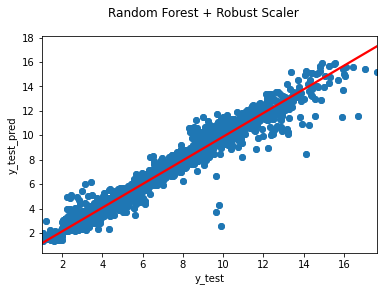

Wall time: 39.7 s


In [45]:
%%time

rf_pipe = make_pipeline(RobustScaler(), RandomForestRegressor())
result_evaluation(rf_pipe, "Random Forest + Robust Scaler", x_train, y_train, x_test, y_test)

The R2 score is not as good as without scaler, hence scaler is not really useful here

#### Other Model: Decision Tree Regressor <a class="anchor" id="tree"></a>

Train R2 =  0.9958577554201654
Test R2 =  0.9432521677410792
Train MSE =  0.031018948922658836
Test MSE =  0.41937194326110616
Train RMSE =  0.176121971720336
Test RMSE =  0.6475893322632069
Train MAE =  0.07041108205112184
Test MAE =  0.39452983726282687


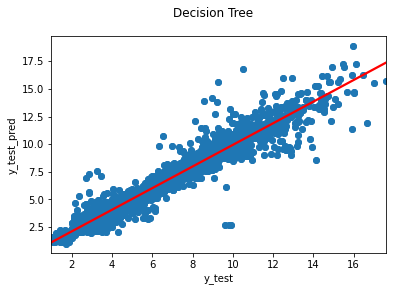

Wall time: 1.4 s


In [46]:
%%time

tree = DecisionTreeRegressor(min_samples_leaf=2)
result_evaluation(tree, "Decision Tree", x_train, y_train, x_test, y_test)

#### Other Model: Gardient Boosting Regressor <a class="anchor" id="gradient_boost"></a>

Train R2 =  0.9531496985031258
Test R2 =  0.9549118479268413
Train MSE =  0.3508356595401046
Test MSE =  0.3332057842614845
Train RMSE =  0.5923138184612146
Test RMSE =  0.57723979788428
Train MAE =  0.39381842992014465
Test MAE =  0.3970610593286056


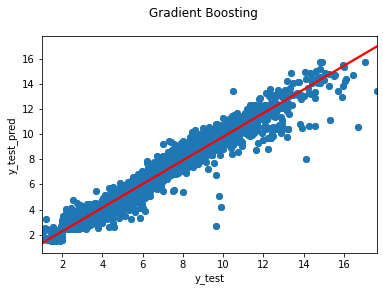

Wall time: 13.3 s


In [47]:
%%time

gb_model = GradientBoostingRegressor()
result_evaluation(gb_model, "Gradient Boosting", x_train, y_train, x_test, y_test)

#### Other Model: XGBoost <a class="anchor" id="xgb"></a>

Train R2 =  0.9893158971400468
Test R2 =  0.9655993035711373
Train MSE =  0.08000726043814486
Test MSE =  0.2542244582151362
Train RMSE =  0.28285554694604254
Test RMSE =  0.5042067613738794
Train MAE =  0.20751442398648934
Test MAE =  0.32147725382698533


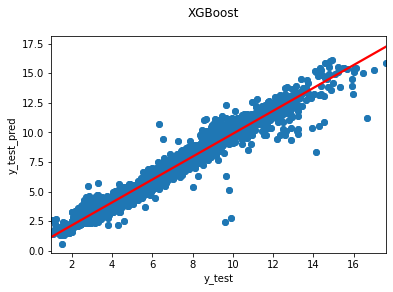

Wall time: 4.21 s


In [48]:
%%time

xgb = XGBRegressor()
result_evaluation(xgb, "XGBoost", x_train, y_train, x_test, y_test)

### Feature Selection <a class="anchor" id="feature_select"></a>

Feature selection is the process of selecting optimal number of features from dataset. In this assignment, mutual_info_regression is used to perform feature selection for regression task in dataset. Dependency between two exploratory variables is measured. Higher value means higher dependency of variables and hence more importance it is in dataset. 

In [34]:
import gc

# free up some space on RAM
# del df_test
del df_train
del df_cpy
gc.collect()

12910

In [35]:
%%time
info = mutual_info_regression(X,Y)
info

Wall time: 8min 38s


array([5.01678788e-01, 1.35031490e-02, 1.68070880e-01, 1.13083752e+00,
       2.92948422e-01, 2.61587561e-01, 1.44513729e+00, 4.33931403e-01,
       1.43330645e-01, 2.08744782e-01, 1.58336654e+00, 8.94035522e-01,
       5.25280795e-02, 3.04970674e-02, 1.00625157e-01, 2.16141565e-02,
       2.71316551e-04, 7.67081690e-04, 1.33007986e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       9.64838983e-04, 0.00000000e+00, 0.00000000e+00, 2.14617278e-03,
       1.28116920e-03, 2.47978276e-03, 2.58799698e-01, 7.73794481e-02,
       9.62958452e-03])

In [36]:
col_info = list(zip(X.columns,info))
col_info = sorted(col_info,reverse=True,key=lambda x:x[1])
col_info, len(col_info)

([('resistance(ohm)', 1.583366540712512),
  ('motor_torque(N-m)', 1.4451372927131017),
  ('blades_angle(°)', 1.1308375217222864),
  ('rotor_torque(N-m)', 0.8940355220557903),
  ('wind_speed(m/s)', 0.5016787881776761),
  ('atmospheric_pressure(Pascal)', 0.43393140271410324),
  ('gearbox_temperature(°C)', 0.2929484221273633),
  ('engine_temperature(°C)', 0.2615875609734104),
  ('dmonth', 0.25879969816763104),
  ('wind_direction(°)', 0.20874478216281478),
  ('shaft_temperature(°C)', 0.16807088015954008),
  ('area_temperature(°C)', 0.14333064481535285),
  ('blade_breadth(m)', 0.1006251573204171),
  ('dday', 0.07737944805882435),
  ('cloud_level', 0.052528079505179015),
  ('blade_length(m)', 0.03049706740515301),
  ('windmill_height(m)', 0.02161415646886944),
  ('atmospheric_temperature(°C)', 0.013503148956250044),
  ('ddayofweek', 0.00962958452025564),
  ('turbine_status_D', 0.002479782762939031),
  ('turbine_status_BCB', 0.0021461727772320582),
  ('turbine_status_AAA', 0.00133007985746114

selecting only those columns with mutual gain>0.1

In [37]:
selected_cols = [ci[0] for ci in col_info if ci[1]>0.1]
selected_cols

['resistance(ohm)',
 'motor_torque(N-m)',
 'blades_angle(°)',
 'rotor_torque(N-m)',
 'wind_speed(m/s)',
 'atmospheric_pressure(Pascal)',
 'gearbox_temperature(°C)',
 'engine_temperature(°C)',
 'dmonth',
 'wind_direction(°)',
 'shaft_temperature(°C)',
 'area_temperature(°C)',
 'blade_breadth(m)']

In [69]:
x_train_featured = x_train[selected_cols]
x_test_featured = x_test[selected_cols]

In [ ]:
from sklearn.preprocessing import scale

scaler = scale(X_train)
X_train = pd.DataFrame(scaler.fit_transform(X_train.values), columns=X_train.columns, index=X_train.index)

#### Pipeline: Original Models + Feature Selected Variables <a class="anchor" id="pipe_feat"></a>

In [162]:
%%time
pipeline = Pipeline([
    ('clf', ClfSwitcher()),
])

parameters = [
    {
        'clf__estimator': [LinearRegression()],
    },
    {
        'clf__estimator': [Ridge()],
        'clf__estimator__alpha': (0.0001,0.0005,0.001,0.005,0.01,0.1,1.0,10),
    },
    {
        'clf__estimator': [Lasso()],
        'clf__estimator__alpha': (0.0001,0.0005,0.001,0.005,0.01,0.1,1.0,10),
    },
    {
        'clf__estimator': [GradientBoostingRegressor()],
    },
    {
        'clf__estimator': [DecisionTreeRegressor()],
        'clf__estimator__min_samples_leaf': [2],
    },
    {
        'clf__estimator': [XGBRegressor()],
    },
    {
        'clf__estimator': [RandomForestRegressor()],
    },
]


scaler_pipe = GridSearchCV(pipeline, parameters, scoring='r2')
scaler_pipe.fit(x_train_featured, y_train)
# result_evaluation(LinearRegression(), "Linear Regression", x_train, y_train, x_test, y_test)

Wall time: 3min 29s


GridSearchCV(estimator=Pipeline(steps=[('clf', ClfSwitcher())]),
             param_grid=[{'clf__estimator': [LinearRegression()]},
                         {'clf__estimator': [Ridge()],
                          'clf__estimator__alpha': (0.0001, 0.0005, 0.001,
                                                    0.005, 0.01, 0.1, 1.0,
                                                    10)},
                         {'clf__estimator': [Lasso()],
                          'clf__estimator__alpha': (0.0001, 0.0005, 0.001,
                                                    0.005, 0.01, 0.1, 1.0,
                                                    10)},
                         {'clf__estimator': [GradientBoostingRegres...
                                                          max_delta_step=None,
                                                          max_depth=None,
                                                          min_child_weight=None,
                                     

In [163]:
scaler_pipe.best_estimator_

Pipeline(steps=[('clf', ClfSwitcher(estimator=RandomForestRegressor()))])

In [164]:
scaler_pipe.best_params_

{'clf__estimator': RandomForestRegressor()}

In [165]:
scaler_pipe.best_score_

0.9586339077102866

#### Best: Random Forest + Feature Selected Variables <a class="anchor" id="pipe_feat"></a>

Train R2 =  0.9943174598176386
Test R2 =  0.9665397134780007
Train MSE =  0.042553359723307774
Test MSE =  0.24727473847423273
Train RMSE =  0.2062846570235115
Test RMSE =  0.49726727066461224
Train MAE =  0.11243244681059353
Test MAE =  0.29433150154093457


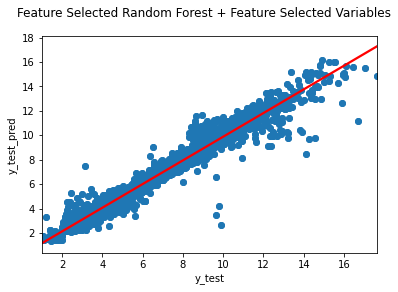

In [70]:
result_evaluation(RandomForestRegressor(), "Feature Selected Random Forest + Feature Selected Variables", 
                  x_train_featured, y_train, x_test_featured, y_test)

#### Pipeline: Original Models + Robust Scaler + Feature Selected Variables <a class="anchor" id="pipe_feat_scale"></a>

In [167]:
%%time
pipeline = Pipeline([
    ('preprocessor', RobustScaler()),
    ('clf', ClfSwitcher()),
])

parameters = [
    {
        'clf__estimator': [LinearRegression()],
    },
    {
        'clf__estimator': [Ridge()],
        'clf__estimator__alpha': (0.0001,0.0005,0.001,0.005,0.01,0.1,1.0,10),
    },
    {
        'clf__estimator': [Lasso()],
        'clf__estimator__alpha': (0.0001,0.0005,0.001,0.005,0.01,0.1,1.0,10),
    },
    {
        'clf__estimator': [GradientBoostingRegressor()],
    },
    {
        'clf__estimator': [DecisionTreeRegressor()],
        'clf__estimator__min_samples_leaf': [2],
    },
    {
        'clf__estimator': [XGBRegressor()],
    },
    {
        'clf__estimator': [RandomForestRegressor()],
    },
]


scaler_pipe = GridSearchCV(pipeline, parameters, scoring='r2')
scaler_pipe.fit(x_train_featured, y_train)
# result_evaluation(LinearRegression(), "Linear Regression", x_train, y_train, x_test, y_test)

Wall time: 3min 35s


GridSearchCV(estimator=Pipeline(steps=[('preprocessor', RobustScaler()),
                                       ('clf', ClfSwitcher())]),
             param_grid=[{'clf__estimator': [LinearRegression()]},
                         {'clf__estimator': [Ridge()],
                          'clf__estimator__alpha': (0.0001, 0.0005, 0.001,
                                                    0.005, 0.01, 0.1, 1.0,
                                                    10)},
                         {'clf__estimator': [Lasso()],
                          'clf__estimator__alpha': (0.0001, 0.0005, 0.001,
                                                    0.005, 0.01, 0.1, 1.0,
                                                    10)},
                         {'clf__es...
                                                          max_delta_step=None,
                                                          max_depth=None,
                                                          min_child_weight=Non

In [168]:
scaler_pipe.best_estimator_

Pipeline(steps=[('preprocessor', RobustScaler()),
                ('clf', ClfSwitcher(estimator=RandomForestRegressor()))])

In [169]:
scaler_pipe.best_params_

{'clf__estimator': RandomForestRegressor()}

#### Best: Random Forest Regressor + Robust Scaler + Feature Selected Variables <a class="anchor" id="rf_scale_feat"></a>

Train R2 =  0.9940956466252611
Test R2 =  0.966576131080938
Train MSE =  0.04421439444786852
Test MSE =  0.24700560888276113
Train RMSE =  0.21027219133273073
Test RMSE =  0.4969965884015313
Train MAE =  0.11303584078547882
Test MAE =  0.296139283463831


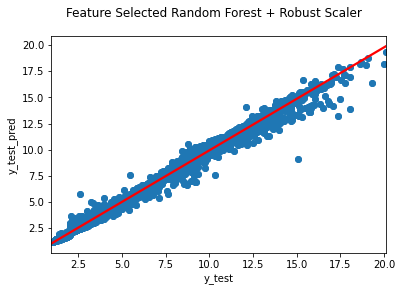

Wall time: 35.2 s


In [190]:
%%time

rf_pipe = make_pipeline(RobustScaler(), 
                         RandomForestRegressor())

result_evaluation(rf_pipe, "Feature Selected Random Forest + Robust Scaler", 
                  x_train_featured, y_train, x_test_featured, y_test)

#### Finalize Result <a class="anchor" id="final_result"></a>

| Scenario    | Best Model  | R2     | RMSE | MAE|
| :---        |    :----:   | :----: | :--: | ---: |
| Dataset     | Random Forest | 0.9692 | 0.4769 | 0.2906|
| Dataset + Cross Validation     | Random Forest | 0.9593 | - | -|
| Dataset + Scaler     | Random Forest | 0.9689 | 0.4794 | 0.2920|
| Dataset + Feature Selection     | Random Forest | 0.9665 | 0.4975 | 0.2956|
| Dataset + Scaler + Feature Selection  | Random Forest | 0.9666 | 0.4970 | 0.2961|

From the result shown in table above, we can conclude that cross validation, Scaler and Feature Selection does not help to improve performance of regression model.

### HyperParameter Tuning: Bayesian Optimization <a class="anchor" id="tune_xgb"></a>

#### Tune XGBoost Regressor

The reason of Bayesian optimization is chosen over grid search is because grid search required very long runtime to search for best parameters in conditions that the range of best parameters is unknown. With Bayesian optimization, we can tune hyper-parameters with larger range. 


Parameters:
- n_estimators: Number of gradient boosted trees. Boosting is a type of ensemble learning that build several trees sequentially.
- max_depth: Maximum tree depth for base learners.
- n_jobs: number of parallel (cpu) threads to build trees. -1 means use all thread.
- learning_rate: control the weighting of new trees added to the mode;.
- reg_lambda: L2 regularization term on weights.
- reg_alpha: L1 regularization term on weights

In [35]:
from bayes_opt import BayesianOptimization

### XGBoost <a class="anchor" id="xgb_bayes"></a>

In [78]:
%%time

def validate(max_depth, learning_rate, n_estimators, reg_lambda, reg_alpha):    
    model = XGBRegressor(max_depth=int(max_depth),
                         learning_rate=float(learning_rate),
                         n_estimators=int(n_estimators),
                         reg_lambda=float(reg_lambda),
                         reg_alpha=float(reg_alpha),
                         n_jobs=-1)
    
    result = model.fit(x_train, y_train)
    y_test_pred = model.predict(x_test)
    #result = np.sqrt(result)
    return r2_score(y_true=y_test,y_pred=y_test_pred)

pbounds =  {'max_depth': (3, 7),
            'learning_rate': (0.01, 0.5),
            'n_estimators': (400, 600),
            'reg_lambda': (0.001, 0.1),
            'reg_alpha': (0.1, 0.5)}


# Use the expected improvement acquisition function to handle negative numbers
# init and iter can be lower
optimizer = BayesianOptimization(f=validate, pbounds=pbounds)
optimizer.maximize(init_points=10, n_iter=50, acq='ucb')

|   iter    |  target   | learni... | max_depth | n_esti... | reg_alpha | reg_la... |
-------------------------------------------------------------------------------------
|  1        |  0.9642   |  0.3025   |  3.986    |  496.9    |  0.3039   |  0.0268   |
|  2        |  0.9635   |  0.3899   |  6.558    |  430.3    |  0.4372   |  0.04837  |
|  3        |  0.9682   |  0.2084   |  6.159    |  563.7    |  0.3016   |  0.06702  |
|  4        |  0.9687   |  0.01172  |  6.526    |  542.2    |  0.1681   |  0.02971  |
|  5        |  0.9684   |  0.1549   |  4.44     |  537.8    |  0.135    |  0.05666  |
|  6        |  0.9699   |  0.1053   |  5.664    |  468.1    |  0.3547   |  0.02664  |
|  7        |  0.9661   |  0.2588   |  4.93     |  579.1    |  0.4509   |  0.07213  |
|  8        |  0.9657   |  0.2967   |  6.857    |  566.3    |  0.3514   |  0.05174  |
|  9        |  0.9595   |  0.4829   |  6.904    |  423.1    |  0.3928   |  0.02075  |
|  10       |  0.9686   |  0.1434   |  5.35     |  448

|  58       |  0.969    |  0.1347   |  5.622    |  468.1    |  0.4145   |  0.07254  |
|  59       |  0.9643   |  0.01     |  5.552    |  509.6    |  0.5      |  0.1      |
|  60       |  0.9682   |  0.01193  |  6.642    |  467.8    |  0.1794   |  0.02208  |
Wall time: 15min


In [79]:
# Get the best params from bayesian
params = optimizer.max['params']
params

{'learning_rate': 0.08027336782822685,
 'max_depth': 6.270578060750739,
 'n_estimators': 468.5966530533219,
 'reg_alpha': 0.4486265847442289,
 'reg_lambda': 0.09265768317494884}

parameters such as n_estimators, max_depth should be int.

In [80]:
# Set to int if floats
params['max_depth'] = int(params['max_depth'])
params['n_estimators'] = int(params['n_estimators'])
params

{'learning_rate': 0.08027336782822685,
 'max_depth': 6,
 'n_estimators': 468,
 'reg_alpha': 0.4486265847442289,
 'reg_lambda': 0.09265768317494884}

Train R2 =  0.9931182731445696
Test R2 =  0.9705065405035518
Train MSE =  0.05153339686108282
Test MSE =  0.21795950488617755
Train RMSE =  0.22700968450945616
Test RMSE =  0.4668613336807596
Train MAE =  0.1688641778539314
Test MAE =  0.293600631557378


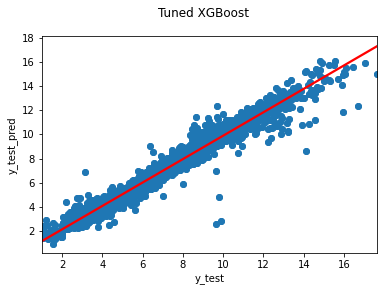

Wall time: 17.9 s


In [81]:
%%time

xgb = XGBRegressor(**params, n_jobs=-1)
result_evaluation(xgb, "Tuned XGBoost", x_train, y_train, x_test, y_test)

#### Gradient Boosting <a class="anchor" id="gb_bayes"></a>

In [ ]:
%%time

def validate(max_depth, min_samples_split, n_estimators, min_samples_leaf):    
    model = GradientBoostingRegressor(max_depth=int(max_depth),
                         min_samples_split=int(min_samples_split),
                         n_estimators=int(n_estimators),
                         min_samples_leaf=int(min_samples_leaf))
    
    result = model.fit(x_train, y_train)
    y_test_pred = model.predict(x_test)
    #result = np.sqrt(result)
    return r2_score(y_true=y_test,y_pred=y_test_pred)

pbounds =  {'max_depth': (3, 7),
            'min_samples_split': (2, 5),
            'n_estimators': (400, 600),
            'min_samples_leaf': (2, 5)}


# Use the expected improvement acquisition function to handle negative numbers
# init and iter can be lower
optimizer = BayesianOptimization(f=validate, pbounds=pbounds)
optimizer.maximize(init_points=10, n_iter=50, acq='ucb')

|   iter    |  target   | max_depth | min_sa... | min_sa... | n_esti... |
-------------------------------------------------------------------------
|  1        |  0.9657   |  3.21     |  4.354    |  3.002    |  554.7    |
|  2        |  0.9705   |  5.519    |  3.412    |  3.626    |  508.0    |
|  3        |  0.9661   |  3.284    |  4.361    |  2.56     |  589.5    |


#### Decision Tree <a class="anchor" id="dt_bayes"></a>

In [ ]:
%%time

def validate(max_depth, min_samples_split, n_estimators, min_samples_leaf):    
    model = GradientBoostingRegressor(max_depth=int(max_depth),
                         min_samples_split=int(min_samples_split),
                         n_estimators=int(n_estimators),
                         min_samples_leaf=int(min_samples_leaf))
    
    result = model.fit(x_train, y_train)
    y_test_pred = model.predict(x_test)
    #result = np.sqrt(result)
    return r2_score(y_true=y_test,y_pred=y_test_pred)

pbounds =  {'max_depth': (3, 7),
            'min_samples_split': (2, 5),
            'n_estimators': (400, 600),
            'min_samples_leaf': (2, 5)}


# Use the expected improvement acquisition function to handle negative numbers
# init and iter can be lower
optimizer = BayesianOptimization(f=validate, pbounds=pbounds)
optimizer.maximize(init_points=10, n_iter=50, acq='ucb')

| Model  | R2     | RMSE | MAE|
| :---  | :----: | :--: | ---: |
| Random Forest | 0.9692 | 0.4769 | 0.2906|
| Tuned XGBoost | 0.9705 | 0.4668 | 0.2994|

### Conclusion <a class="anchor" id="conclude"></a>

In this assignment, density plot, box plot and scatter plot is used to identify and remove outliers in every exploratory variable. Empty numeric exploratory variables are being replaced with mean and median statistical value. Some categorical exploratory variables like cloud level and wind turbine status are being handle using ordinal and one-hot encoding method. Regression model without scaling and feature selected works the best. Hence, we can conclude that scaling and feature selection does not always make better regression model. 

Hyper-parameter tuning can help to improve the performance of regression model. Bayesian optimization is used to tune hyper-parameters of extreme gradient boosting model (XGBoost) which gives lowest RMSE and highest r-squared score, which are 0.47 and 0.9705 respectively. 